In [1]:
from utils import *
from models import *
from train_and_test import *

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
(dataloader_train, dataloader_val, dataloader_test), (tokenizer, input_ids_test) = load_data()

# Training

## Base model

In [3]:
model = BERTClassifier(num_classes=3).to(device)
print([name for name, param in model.named_parameters() if param.requires_grad]) # check that the BERT parameters are well frozen
optimizer = torch.optim.Adam(model.decoder.parameters(), lr=1e-4)
num_epochs = 20
patience=5

['decoder.attention.query_proj.weight', 'decoder.attention.query_proj.bias', 'decoder.attention.key_proj.weight', 'decoder.attention.key_proj.bias', 'decoder.attention.value_proj.weight', 'decoder.attention.value_proj.bias', 'decoder.layer_norm.weight', 'decoder.layer_norm.bias', 'decoder.fc.weight', 'decoder.fc.bias']


100%|██████████| 25/25 [00:08<00:00,  2.96it/s]

Epoch [1/20], Train Loss: 1.0260, Valid Loss: 0.9590, Valid Accuracy: 0.5278, Valid F1 score: 0.4754


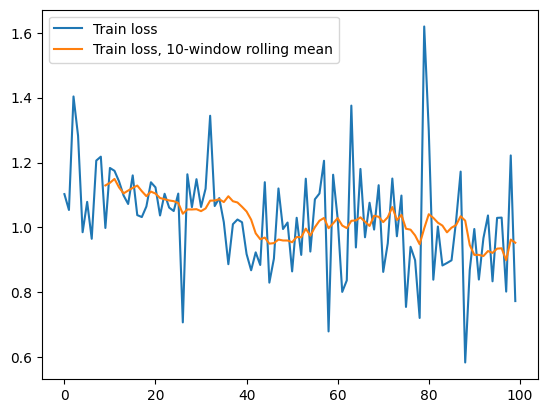

Validation loss improved, saving model...



100%|██████████| 25/25 [00:08<00:00,  2.94it/s]


Epoch [2/20], Train Loss: 0.9190, Valid Loss: 0.9406, Valid Accuracy: 0.5379, Valid F1 score: 0.4778


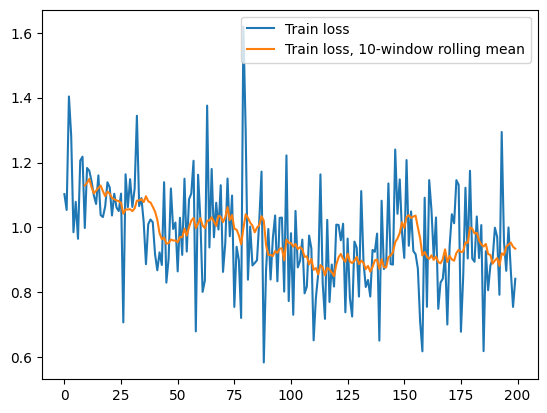

Validation loss improved, saving model...



100%|██████████| 25/25 [00:08<00:00,  2.94it/s]

Epoch [3/20], Train Loss: 0.8671, Valid Loss: 0.9321, Valid Accuracy: 0.5581, Valid F1 score: 0.4979


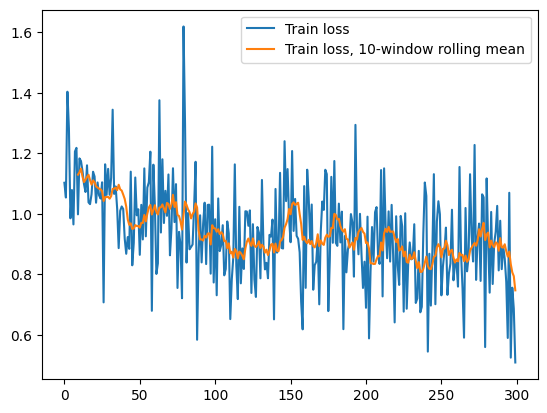

Validation loss improved, saving model...



100%|██████████| 25/25 [00:08<00:00,  2.94it/s]


Epoch [4/20], Train Loss: 0.7995, Valid Loss: 0.8653, Valid Accuracy: 0.5934, Valid F1 score: 0.5692


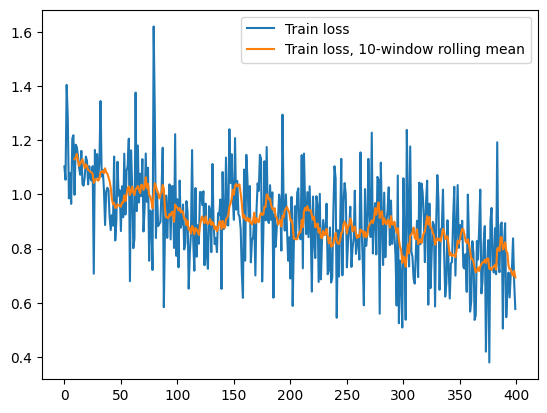

Validation loss improved, saving model...



100%|██████████| 25/25 [00:08<00:00,  2.95it/s]

Epoch [5/20], Train Loss: 0.7686, Valid Loss: 0.8477, Valid Accuracy: 0.5884, Valid F1 score: 0.5701


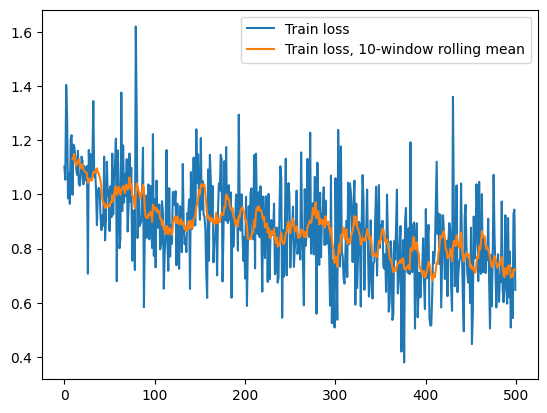

Validation loss improved, saving model...



100%|██████████| 25/25 [00:08<00:00,  2.96it/s]

Epoch [6/20], Train Loss: 0.7398, Valid Loss: 0.8347, Valid Accuracy: 0.6364, Valid F1 score: 0.6388


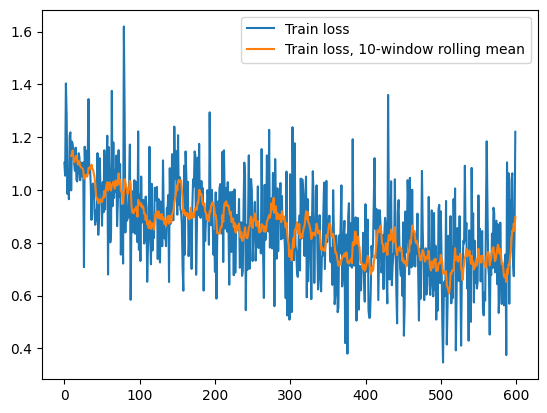

Validation loss improved, saving model...



100%|██████████| 25/25 [00:08<00:00,  2.90it/s]

Epoch [7/20], Train Loss: 0.6925, Valid Loss: 0.8636, Valid Accuracy: 0.6086, Valid F1 score: 0.6130


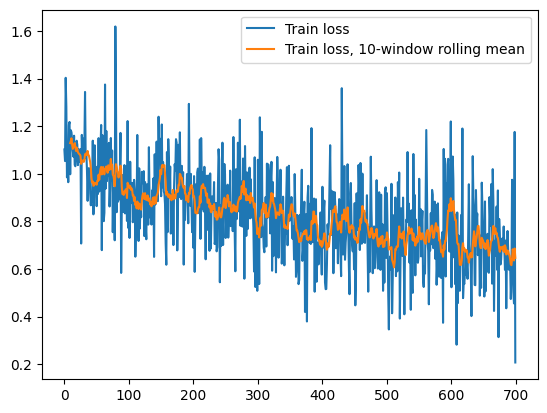

100%|██████████| 25/25 [00:08<00:00,  2.97it/s]

Epoch [8/20], Train Loss: 0.6445, Valid Loss: 0.8309, Valid Accuracy: 0.6414, Valid F1 score: 0.6385


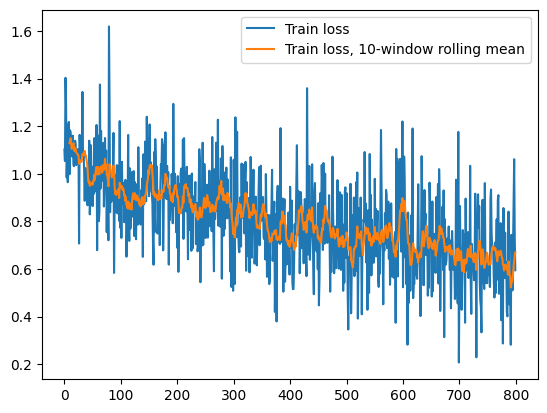

Validation loss improved, saving model...



100%|██████████| 25/25 [00:08<00:00,  2.97it/s]

Epoch [9/20], Train Loss: 0.6159, Valid Loss: 0.8317, Valid Accuracy: 0.6338, Valid F1 score: 0.6305


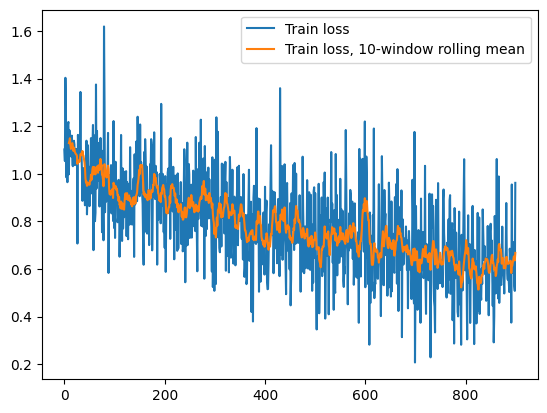

100%|██████████| 25/25 [00:08<00:00,  2.97it/s]


Epoch [10/20], Train Loss: 0.5839, Valid Loss: 0.9026, Valid Accuracy: 0.6288, Valid F1 score: 0.6134


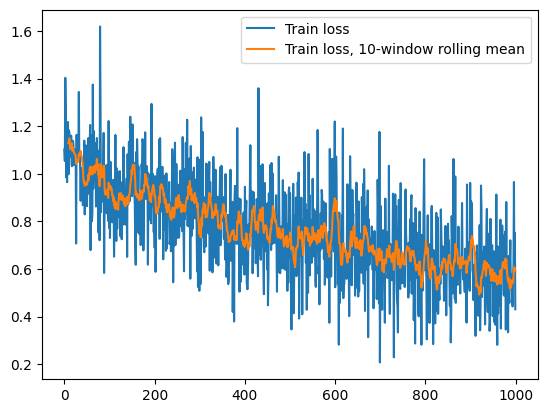

100%|██████████| 25/25 [00:08<00:00,  2.96it/s]


Epoch [11/20], Train Loss: 0.5540, Valid Loss: 0.8613, Valid Accuracy: 0.6439, Valid F1 score: 0.6408


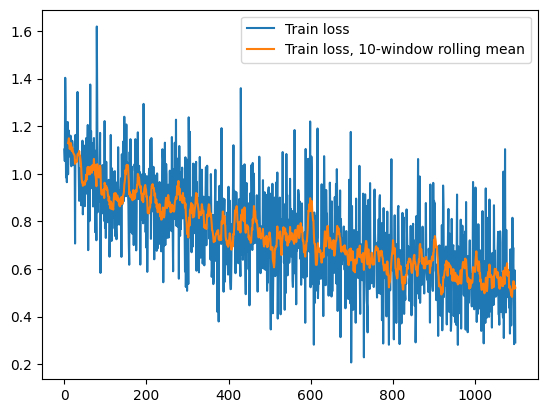

100%|██████████| 25/25 [00:08<00:00,  2.97it/s]


Epoch [12/20], Train Loss: 0.5155, Valid Loss: 0.8972, Valid Accuracy: 0.6338, Valid F1 score: 0.6269


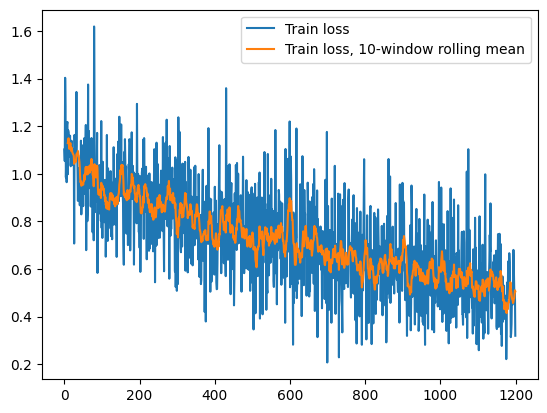

100%|██████████| 25/25 [00:08<00:00,  2.96it/s]


Epoch [13/20], Train Loss: 0.4958, Valid Loss: 0.9311, Valid Accuracy: 0.6338, Valid F1 score: 0.6341


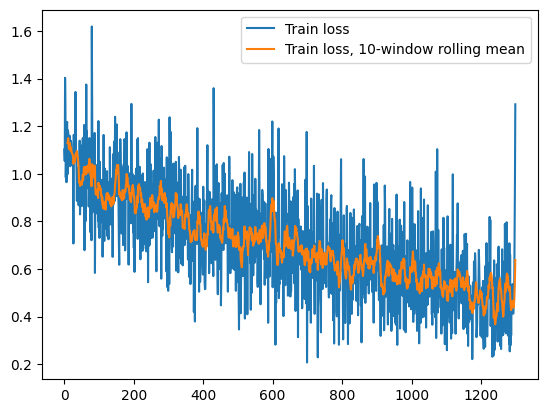

In [4]:
train(device, dataloader_train, dataloader_val, model, optimizer, num_epochs, patience, experiment_name='base')

### Sparsity penalty

In [5]:
model = BERTClassifier(num_classes=3).to(device)
model.load_weights('base/best_model.pt')
print([name for name, param in model.named_parameters() if param.requires_grad]) # check that the BERT parameters are well frozen
optimizer = torch.optim.Adam(model.decoder.parameters(), lr=1e-4)
num_epochs = 3
patience=None

['decoder.attention.query_proj.weight', 'decoder.attention.query_proj.bias', 'decoder.attention.key_proj.weight', 'decoder.attention.key_proj.bias', 'decoder.attention.value_proj.weight', 'decoder.attention.value_proj.bias', 'decoder.layer_norm.weight', 'decoder.layer_norm.bias', 'decoder.fc.weight', 'decoder.fc.bias']


/home/onyxia/work/ensae-aml-projet/code/models.py:127: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(path)


100%|██████████| 25/25 [00:08<00:00,  2.96it/s]


Epoch [1/3], Train Loss: 0.7670, Valid Loss: 1.0313, Valid Sparsity penalty: 0.1321, Valid Accuracy: 0.6212, Valid F1 score: 0.5988


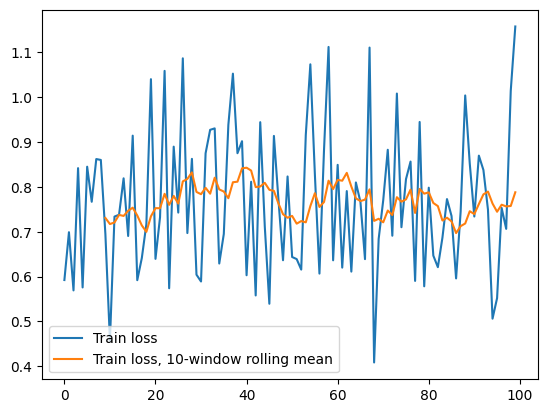

Validation loss improved, saving model...



100%|██████████| 25/25 [00:08<00:00,  2.96it/s]

Epoch [2/3], Train Loss: 0.7224, Valid Loss: 1.0025, Valid Sparsity penalty: 0.1258, Valid Accuracy: 0.6237, Valid F1 score: 0.6154


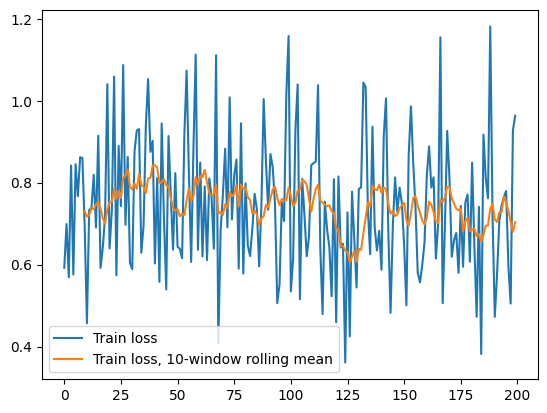

Validation loss improved, saving model...



100%|██████████| 25/25 [00:08<00:00,  2.96it/s]

Epoch [3/3], Train Loss: 0.6865, Valid Loss: 1.0138, Valid Sparsity penalty: 0.1199, Valid Accuracy: 0.6313, Valid F1 score: 0.6336


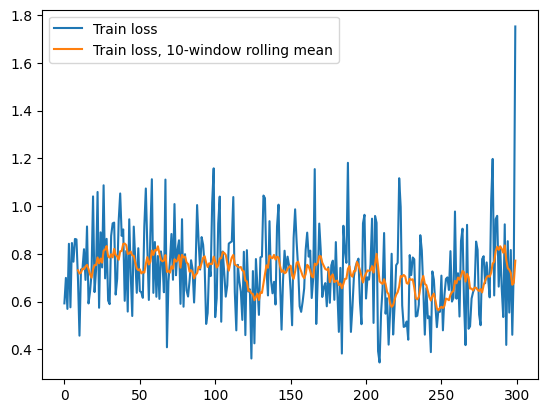

In [6]:
train(device, dataloader_train, dataloader_val, model, optimizer, num_epochs, patience, add_sparsity_penalty=True, experiment_name='base_sparsity_penalty')

### Hard Thresholding

In [7]:
model = BERTClassifier(num_classes=3, threshold=0.02).to(device)
model.load_weights('base/best_model.pt')
print([name for name, param in model.named_parameters() if param.requires_grad]) # check that the BERT parameters are well frozen
optimizer = torch.optim.Adam(model.decoder.parameters(), lr=1e-4)
num_epochs = 3
patience=None

['decoder.attention.query_proj.weight', 'decoder.attention.query_proj.bias', 'decoder.attention.key_proj.weight', 'decoder.attention.key_proj.bias', 'decoder.attention.value_proj.weight', 'decoder.attention.value_proj.bias', 'decoder.layer_norm.weight', 'decoder.layer_norm.bias', 'decoder.fc.weight', 'decoder.fc.bias']


/home/onyxia/work/ensae-aml-projet/code/models.py:127: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(path)


100%|██████████| 25/25 [00:08<00:00,  2.94it/s]


Epoch [1/3], Train Loss: 0.6173, Valid Loss: 0.8617, Valid Accuracy: 0.6515, Valid F1 score: 0.6534


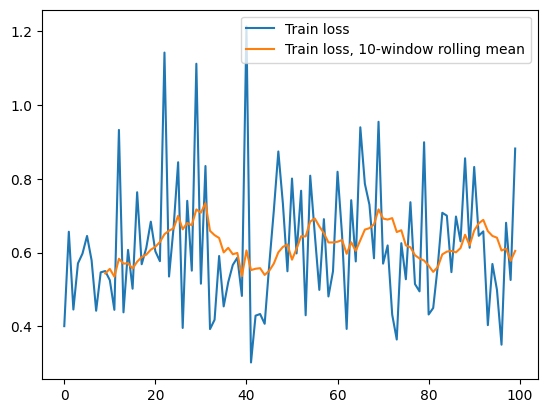

Validation loss improved, saving model...



100%|██████████| 25/25 [00:08<00:00,  2.94it/s]


Epoch [2/3], Train Loss: 0.5785, Valid Loss: 0.8825, Valid Accuracy: 0.6187, Valid F1 score: 0.6088


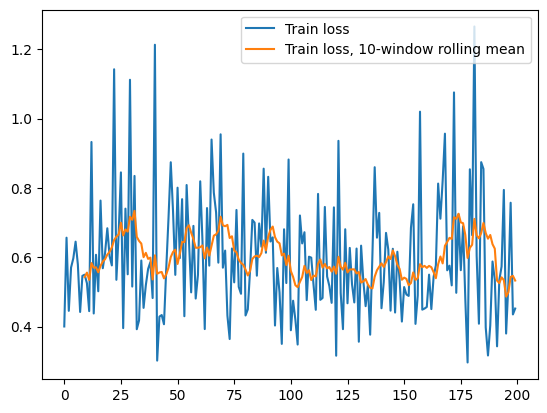

100%|██████████| 25/25 [00:08<00:00,  2.95it/s]

Epoch [3/3], Train Loss: 0.5428, Valid Loss: 0.8745, Valid Accuracy: 0.6288, Valid F1 score: 0.6249


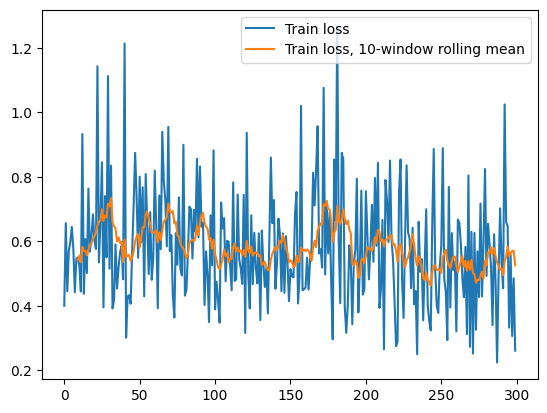

In [8]:
train(device, dataloader_train, dataloader_val, model, optimizer, num_epochs, patience, experiment_name='base_hardthresholding')

### Temperature

In [9]:
model = BERTClassifier(num_classes=3, temperature=0.5).to(device)
model.load_weights('base/best_model.pt')
print([name for name, param in model.named_parameters() if param.requires_grad]) # check that the BERT parameters are well frozen
optimizer = torch.optim.Adam(model.decoder.parameters(), lr=1e-4)
num_epochs = 3
patience=None

['decoder.attention.query_proj.weight', 'decoder.attention.query_proj.bias', 'decoder.attention.key_proj.weight', 'decoder.attention.key_proj.bias', 'decoder.attention.value_proj.weight', 'decoder.attention.value_proj.bias', 'decoder.layer_norm.weight', 'decoder.layer_norm.bias', 'decoder.fc.weight', 'decoder.fc.bias']


/home/onyxia/work/ensae-aml-projet/code/models.py:127: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(path)


100%|██████████| 25/25 [00:08<00:00,  2.96it/s]

Epoch [1/3], Train Loss: 0.5951, Valid Loss: 0.8769, Valid Accuracy: 0.6263, Valid F1 score: 0.6241


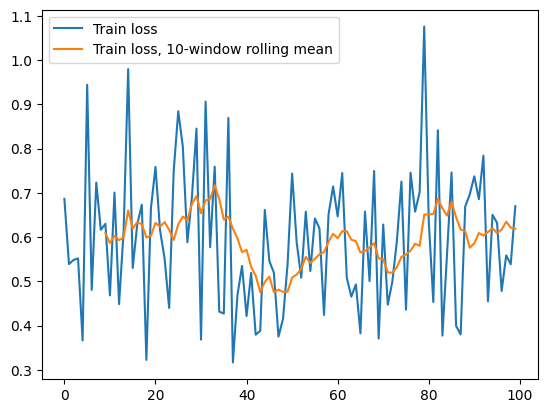

Validation loss improved, saving model...



100%|██████████| 25/25 [00:08<00:00,  2.95it/s]


Epoch [2/3], Train Loss: 0.5687, Valid Loss: 0.8941, Valid Accuracy: 0.6187, Valid F1 score: 0.6131


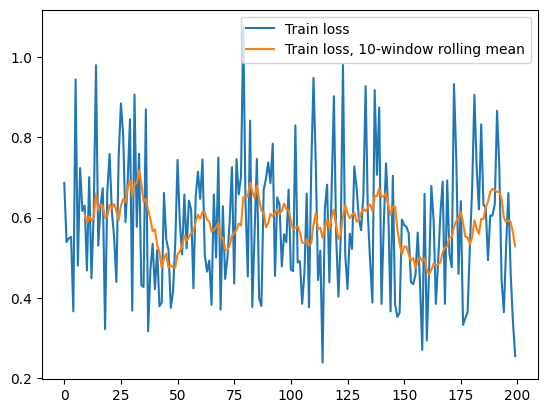

100%|██████████| 25/25 [00:08<00:00,  2.96it/s]


Epoch [3/3], Train Loss: 0.5412, Valid Loss: 0.9128, Valid Accuracy: 0.6237, Valid F1 score: 0.6218


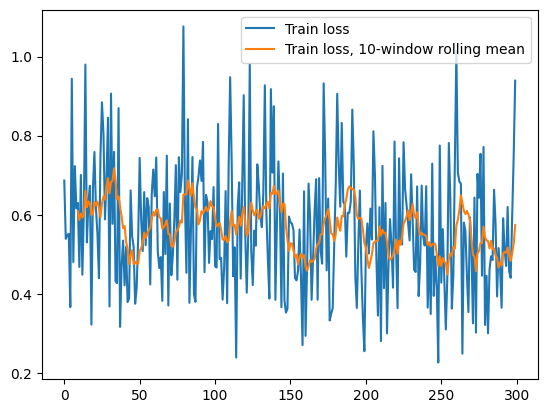

In [10]:
train(device, dataloader_train, dataloader_val, model, optimizer, num_epochs, patience, experiment_name='base_temperature')

## Finetuned model

In [11]:
model = LoRABERTClassifier(num_classes=3).to(device)
# print([name for name, param in model.named_parameters()]) # check that the BERT parameters are well frozen
print([name for name, param in model.named_parameters() if param.requires_grad]) # check that the BERT parameters are well frozen

['bert.encoder.layer.0.attention.self.query.1.lora_A', 'bert.encoder.layer.0.attention.self.query.1.lora_B', 'bert.encoder.layer.0.attention.self.key.1.lora_A', 'bert.encoder.layer.0.attention.self.key.1.lora_B', 'bert.encoder.layer.0.attention.self.value.1.lora_A', 'bert.encoder.layer.0.attention.self.value.1.lora_B', 'bert.encoder.layer.1.attention.self.query.1.lora_A', 'bert.encoder.layer.1.attention.self.query.1.lora_B', 'bert.encoder.layer.1.attention.self.key.1.lora_A', 'bert.encoder.layer.1.attention.self.key.1.lora_B', 'bert.encoder.layer.1.attention.self.value.1.lora_A', 'bert.encoder.layer.1.attention.self.value.1.lora_B', 'bert.encoder.layer.2.attention.self.query.1.lora_A', 'bert.encoder.layer.2.attention.self.query.1.lora_B', 'bert.encoder.layer.2.attention.self.key.1.lora_A', 'bert.encoder.layer.2.attention.self.key.1.lora_B', 'bert.encoder.layer.2.attention.self.value.1.lora_A', 'bert.encoder.layer.2.attention.self.value.1.lora_B', 'bert.encoder.layer.3.attention.self.qu

In [12]:
# Create optimizer with different learning rates
decoder_params = model.decoder.parameters()
lora_params = model.bert.parameters()
optimizer = torch.optim.AdamW([
    {'params': decoder_params, 'lr': 1e-4},  # Higher learning rate for decoder
    {'params': lora_params, 'lr': 1e-5}      # Lower learning rate for LoRA
])
num_epochs = 20
patience=5

100%|██████████| 25/25 [00:08<00:00,  2.96it/s]


Epoch [1/20], Train Loss: 1.0248, Valid Loss: 0.9973, Valid Accuracy: 0.4621, Valid F1 score: 0.3745


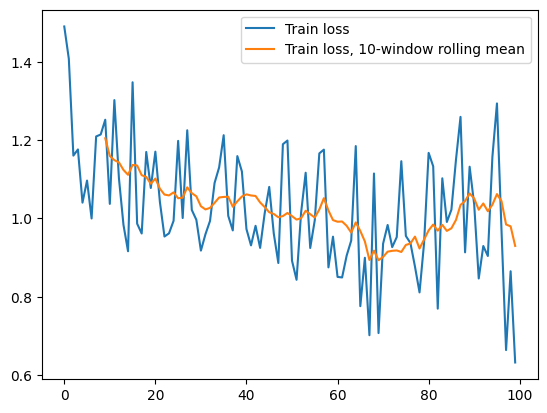

Validation loss improved, saving model...



100%|██████████| 25/25 [00:08<00:00,  2.96it/s]


Epoch [2/20], Train Loss: 0.9209, Valid Loss: 0.9063, Valid Accuracy: 0.5833, Valid F1 score: 0.5751


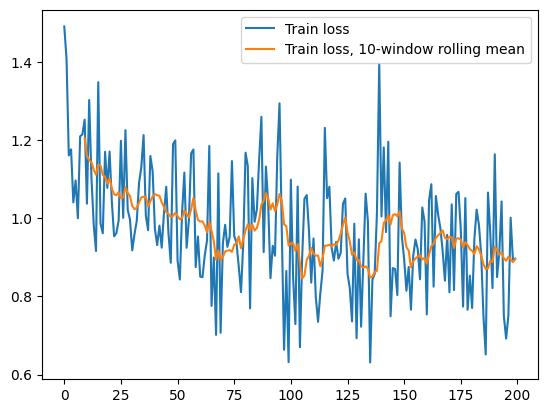

Validation loss improved, saving model...



100%|██████████| 25/25 [00:08<00:00,  2.96it/s]


Epoch [3/20], Train Loss: 0.8554, Valid Loss: 0.8734, Valid Accuracy: 0.5631, Valid F1 score: 0.5473


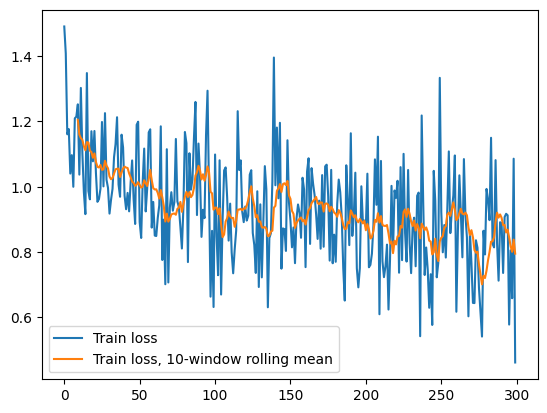

Validation loss improved, saving model...



100%|██████████| 25/25 [00:08<00:00,  2.96it/s]

Epoch [4/20], Train Loss: 0.8128, Valid Loss: 0.8444, Valid Accuracy: 0.6162, Valid F1 score: 0.5975


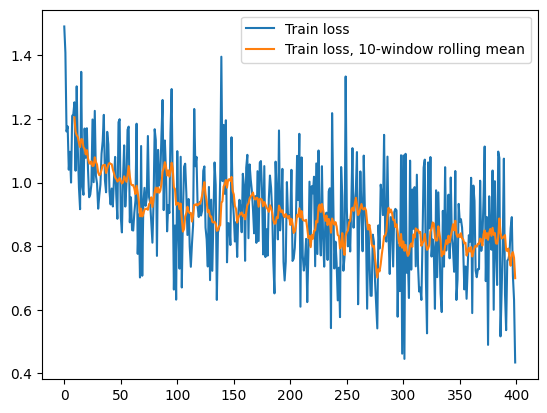

Validation loss improved, saving model...



100%|██████████| 25/25 [00:08<00:00,  2.96it/s]

Epoch [5/20], Train Loss: 0.7869, Valid Loss: 0.8412, Valid Accuracy: 0.6035, Valid F1 score: 0.5932


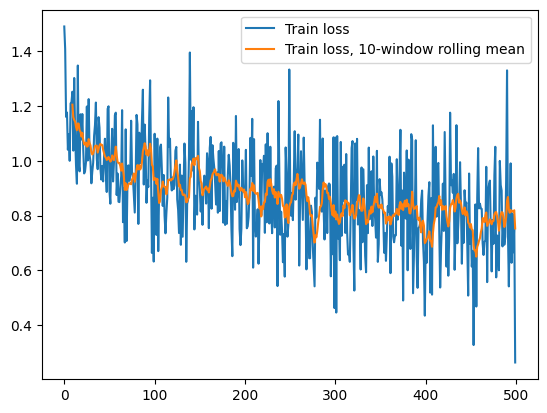

Validation loss improved, saving model...



100%|██████████| 25/25 [00:08<00:00,  2.97it/s]

Epoch [6/20], Train Loss: 0.7411, Valid Loss: 0.8279, Valid Accuracy: 0.6414, Valid F1 score: 0.6416


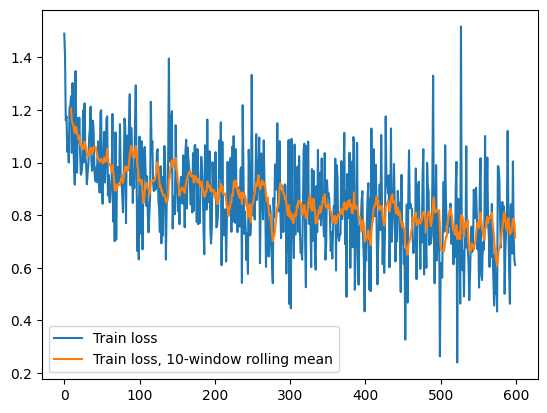

Validation loss improved, saving model...



100%|██████████| 25/25 [00:08<00:00,  2.96it/s]

Epoch [7/20], Train Loss: 0.7065, Valid Loss: 0.8116, Valid Accuracy: 0.6364, Valid F1 score: 0.6325


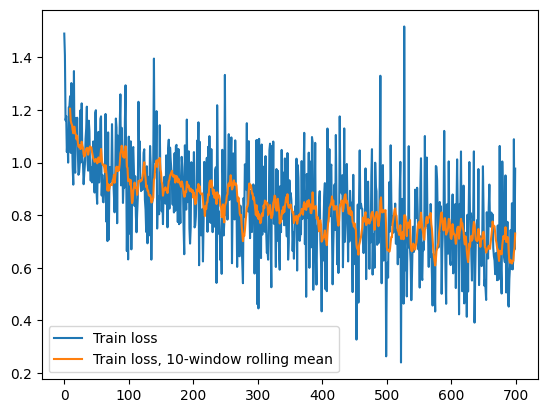

Validation loss improved, saving model...



100%|██████████| 25/25 [00:08<00:00,  2.96it/s]


Epoch [8/20], Train Loss: 0.6827, Valid Loss: 0.8393, Valid Accuracy: 0.6086, Valid F1 score: 0.6020


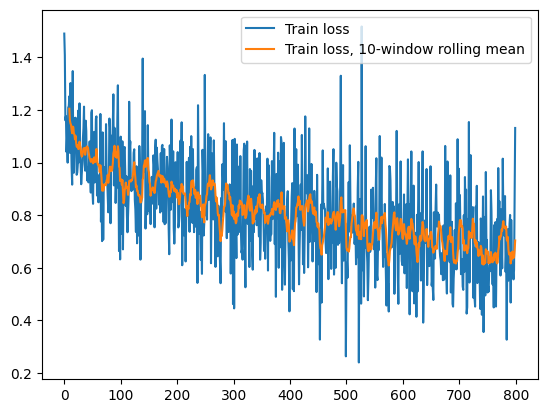

100%|██████████| 25/25 [00:08<00:00,  2.96it/s]

Epoch [9/20], Train Loss: 0.6165, Valid Loss: 0.8382, Valid Accuracy: 0.6288, Valid F1 score: 0.6191


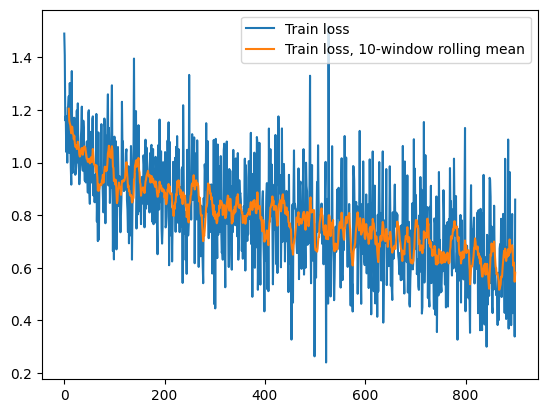

100%|██████████| 25/25 [00:08<00:00,  2.97it/s]

Epoch [10/20], Train Loss: 0.5946, Valid Loss: 0.8591, Valid Accuracy: 0.6086, Valid F1 score: 0.6074


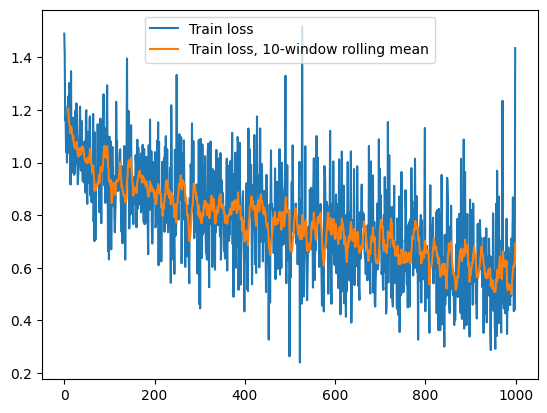

100%|██████████| 25/25 [00:08<00:00,  2.96it/s]


Epoch [11/20], Train Loss: 0.5320, Valid Loss: 0.8938, Valid Accuracy: 0.6490, Valid F1 score: 0.6504


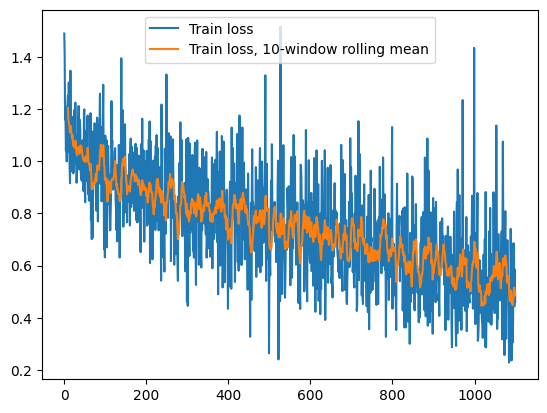

100%|██████████| 25/25 [00:08<00:00,  2.96it/s]

Epoch [12/20], Train Loss: 0.5049, Valid Loss: 0.8951, Valid Accuracy: 0.6288, Valid F1 score: 0.6284


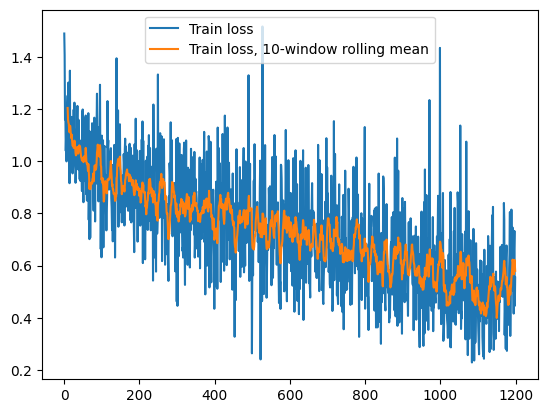

In [13]:
train(device, dataloader_train, dataloader_val, model, optimizer, num_epochs, patience, experiment_name='lora')

### Sparsity penalty

In [14]:
model = LoRABERTClassifier(num_classes=3).to(device)
model.load_weights('lora/best_model.pt')
# Create optimizer with different learning rates
decoder_params = model.decoder.parameters()
lora_params = model.bert.parameters()
optimizer = torch.optim.AdamW([
    {'params': decoder_params, 'lr': 1e-4},  # Higher learning rate for decoder
    {'params': lora_params, 'lr': 1e-5}      # Lower learning rate for LoRA
])
num_epochs = 3
patience=None

/home/onyxia/work/ensae-aml-projet/code/models.py:199: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lora_decoder_weights = torch.load(path)


100%|██████████| 25/25 [00:08<00:00,  2.97it/s]

Epoch [1/3], Train Loss: 0.8264, Valid Loss: 0.9576, Valid Sparsity penalty: 0.1306, Valid Accuracy: 0.6338, Valid F1 score: 0.6323


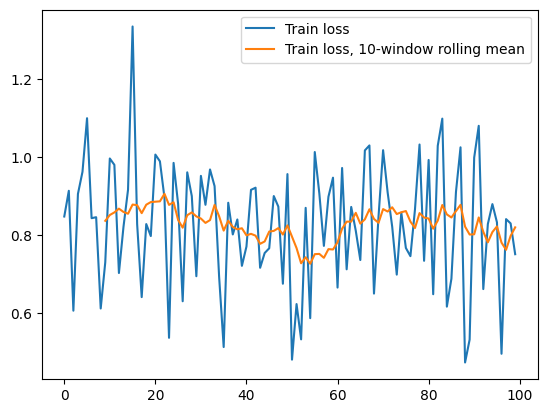

Validation loss improved, saving model...



100%|██████████| 25/25 [00:08<00:00,  2.97it/s]

Epoch [2/3], Train Loss: 0.7641, Valid Loss: 0.9669, Valid Sparsity penalty: 0.1220, Valid Accuracy: 0.6465, Valid F1 score: 0.6420


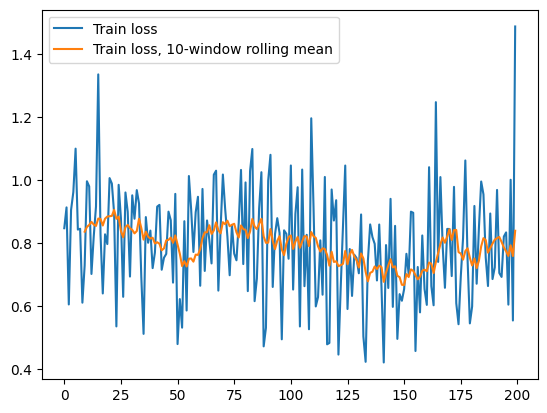

100%|██████████| 25/25 [00:08<00:00,  2.97it/s]

Epoch [3/3], Train Loss: 0.7187, Valid Loss: 0.9802, Valid Sparsity penalty: 0.1180, Valid Accuracy: 0.6389, Valid F1 score: 0.6382


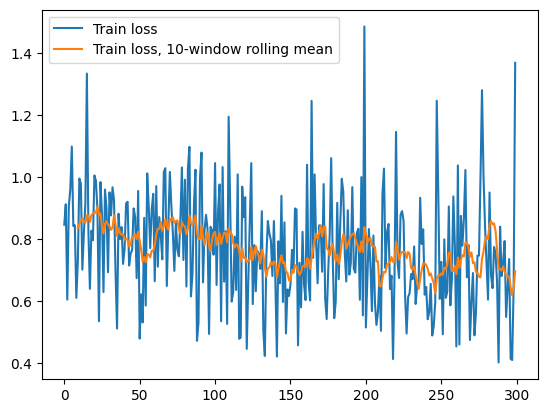

In [15]:
train(device, dataloader_train, dataloader_val, model, optimizer, num_epochs, patience, add_sparsity_penalty=True, experiment_name='lora_sparsity_penalty')

### Hard Thresholding

In [16]:
model = LoRABERTClassifier(num_classes=3, threshold=0.02).to(device)
model.load_weights('lora/best_model.pt')
# Create optimizer with different learning rates
decoder_params = model.decoder.parameters()
lora_params = model.bert.parameters()
optimizer = torch.optim.AdamW([
    {'params': decoder_params, 'lr': 1e-4},  # Higher learning rate for decoder
    {'params': lora_params, 'lr': 1e-5}      # Lower learning rate for LoRA
])
num_epochs = 3
patience=None

/home/onyxia/work/ensae-aml-projet/code/models.py:199: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lora_decoder_weights = torch.load(path)


100%|██████████| 25/25 [00:08<00:00,  2.96it/s]


Epoch [1/3], Train Loss: 0.6497, Valid Loss: 0.8451, Valid Accuracy: 0.6364, Valid F1 score: 0.6362


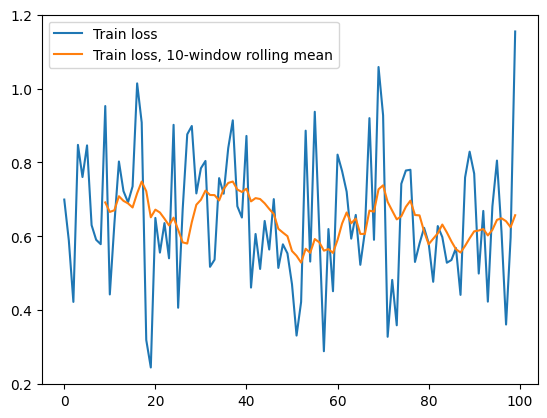

Validation loss improved, saving model...



100%|██████████| 25/25 [00:08<00:00,  2.95it/s]

Epoch [2/3], Train Loss: 0.6158, Valid Loss: 0.8417, Valid Accuracy: 0.6465, Valid F1 score: 0.6378


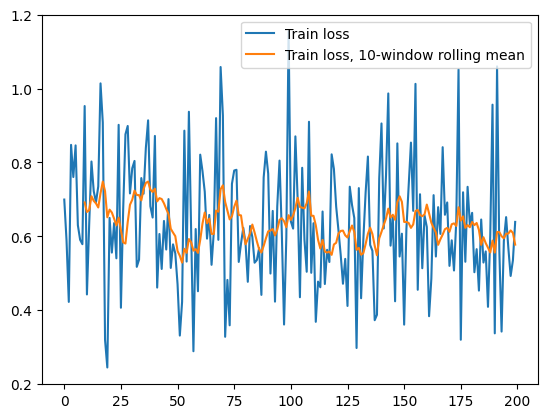

Validation loss improved, saving model...



100%|██████████| 25/25 [00:08<00:00,  2.96it/s]

Epoch [3/3], Train Loss: 0.5815, Valid Loss: 0.8603, Valid Accuracy: 0.6263, Valid F1 score: 0.6213


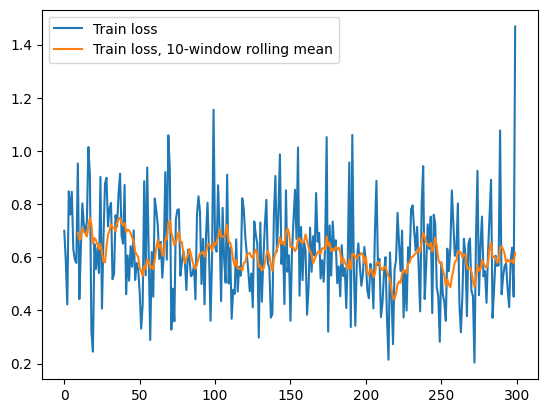

In [17]:
train(device, dataloader_train, dataloader_val, model, optimizer, num_epochs, patience, experiment_name='lora_hardthresholding')

### Temperature

In [18]:
model = LoRABERTClassifier(num_classes=3, temperature=0.5).to(device)
model.load_weights('lora/best_model.pt')
# Create optimizer with different learning rates
decoder_params = model.decoder.parameters()
lora_params = model.bert.parameters()
optimizer = torch.optim.AdamW([
    {'params': decoder_params, 'lr': 1e-4},  # Higher learning rate for decoder
    {'params': lora_params, 'lr': 1e-5}      # Lower learning rate for LoRA
])
num_epochs = 3
patience=None

/home/onyxia/work/ensae-aml-projet/code/models.py:199: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lora_decoder_weights = torch.load(path)


100%|██████████| 25/25 [00:08<00:00,  2.97it/s]


Epoch [1/3], Train Loss: 0.6433, Valid Loss: 0.8296, Valid Accuracy: 0.6414, Valid F1 score: 0.6403


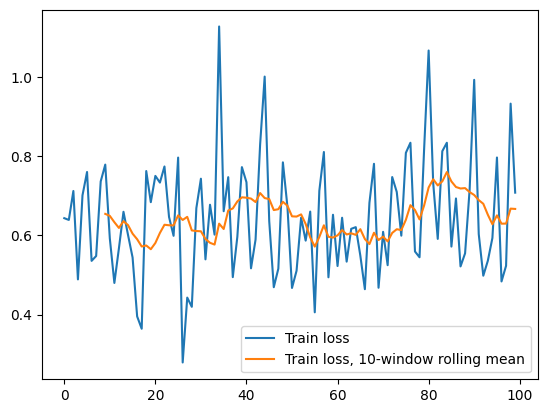

Validation loss improved, saving model...



100%|██████████| 25/25 [00:08<00:00,  2.97it/s]

Epoch [2/3], Train Loss: 0.6172, Valid Loss: 0.8343, Valid Accuracy: 0.6389, Valid F1 score: 0.6370


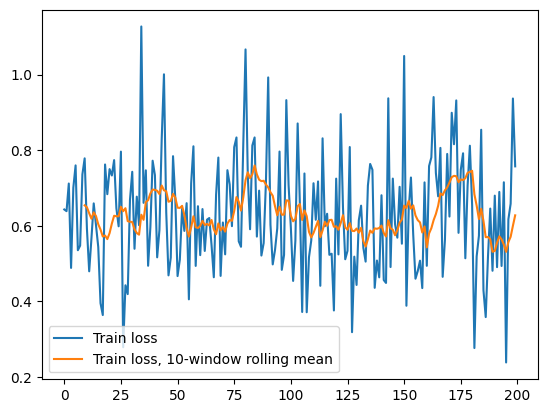

100%|██████████| 25/25 [00:08<00:00,  2.97it/s]

Epoch [3/3], Train Loss: 0.5705, Valid Loss: 0.8648, Valid Accuracy: 0.6490, Valid F1 score: 0.6471


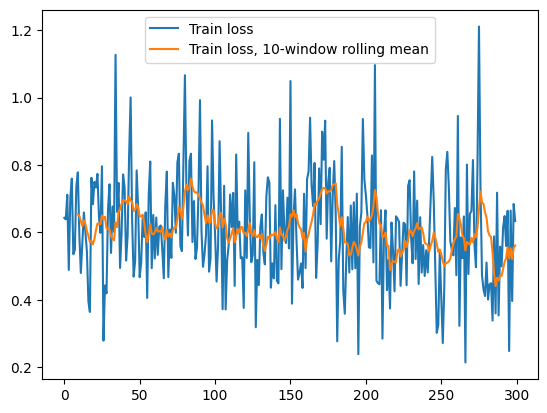

In [19]:
train(device, dataloader_train, dataloader_val, model, optimizer, num_epochs, patience, experiment_name='lora_temperature')

# Testing

In [20]:
preds = []
cls_attn_weightss = []
experiment_names = ['base', 'base_sparsity_penalty', 'base_hardthresholding', 'base_temperature', 'lora', 'lora_sparsity_penalty', 'lora_thresholding', 'lora_temperature']
accs_test = []
f1s_test = []

## Base model

In [21]:
model = BERTClassifier(num_classes=3).to(device)
model.load_weights('base/best_model.pt')

true, pred, cls_attn_weights, acc_test, f1_test = evaluate_on_test(device, dataloader_test, model)
preds.append(pred)
cls_attn_weightss.append(cls_attn_weights)
accs_test.append(acc_test)
f1s_test.append(f1_test)

/home/onyxia/work/ensae-aml-projet/code/models.py:127: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(path)
100%|██████████| 31/31 [00:07<00:00,  4.11

### Sparsity penalty

In [22]:
model = BERTClassifier(num_classes=3).to(device)
model.load_weights('base_sparsity_penalty/best_model.pt')

_, pred, cls_attn_weights, acc_test, f1_test = evaluate_on_test(device, dataloader_test, model)
preds.append(pred)
cls_attn_weightss.append(cls_attn_weights)
accs_test.append(acc_test)
f1s_test.append(f1_test)

/home/onyxia/work/ensae-aml-projet/code/models.py:127: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(path)
100%|██████████| 31/31 [00:07<00:00,  4.09

### Hard Thresholding

In [23]:
model = BERTClassifier(num_classes=3, threshold=0.02).to(device)
model.load_weights('base_hardthresholding/best_model.pt')

_, pred, cls_attn_weights, acc_test, f1_test = evaluate_on_test(device, dataloader_test, model)
preds.append(pred)
cls_attn_weightss.append(cls_attn_weights)
accs_test.append(acc_test)
f1s_test.append(f1_test)

/home/onyxia/work/ensae-aml-projet/code/models.py:127: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(path)
100%|██████████| 31/31 [00:07<00:00,  4.06

### Temperature

In [24]:
model = BERTClassifier(num_classes=3, temperature=0.5).to(device)
model.load_weights('base_temperature/best_model.pt')

_, pred, cls_attn_weights, acc_test, f1_test = evaluate_on_test(device, dataloader_test, model)
preds.append(pred)
cls_attn_weightss.append(cls_attn_weights)
accs_test.append(acc_test)
f1s_test.append(f1_test)

/home/onyxia/work/ensae-aml-projet/code/models.py:127: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(path)
100%|██████████| 31/31 [00:07<00:00,  4.06

## Finetuned model

In [25]:
model = LoRABERTClassifier(num_classes=3).to(device)
model.load_weights('lora/best_model.pt')

_, pred, cls_attn_weights, acc_test, f1_test = evaluate_on_test(device, dataloader_test, model)
preds.append(pred)
cls_attn_weightss.append(cls_attn_weights)
accs_test.append(acc_test)
f1s_test.append(f1_test)

/home/onyxia/work/ensae-aml-projet/code/models.py:199: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lora_decoder_weights = torch.load(path)
100%|██████████| 31/31 [00:07<00

### Sparsity penalty

In [26]:
model = LoRABERTClassifier(num_classes=3).to(device)
model.load_weights('lora_sparsity_penalty/best_model.pt')

_, pred, cls_attn_weights, acc_test, f1_test = evaluate_on_test(device, dataloader_test, model)
preds.append(pred)
cls_attn_weightss.append(cls_attn_weights)
accs_test.append(acc_test)
f1s_test.append(f1_test)

/home/onyxia/work/ensae-aml-projet/code/models.py:199: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lora_decoder_weights = torch.load(path)
100%|██████████| 31/31 [00:07<00

### Hard Thresholding

In [27]:
model = LoRABERTClassifier(num_classes=3, threshold=0.02).to(device)
model.load_weights('lora_hardthresholding/best_model.pt')

_, pred, cls_attn_weights, acc_test, f1_test = evaluate_on_test(device, dataloader_test, model)
preds.append(pred)
cls_attn_weightss.append(cls_attn_weights)
accs_test.append(acc_test)
f1s_test.append(f1_test)

/home/onyxia/work/ensae-aml-projet/code/models.py:199: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lora_decoder_weights = torch.load(path)
100%|██████████| 31/31 [00:07<00

### Temperature

In [28]:
model = LoRABERTClassifier(num_classes=3, temperature=0.5).to(device)
model.load_weights('lora_temperature/best_model.pt')

_, pred, cls_attn_weights, acc_test, f1_test = evaluate_on_test(device, dataloader_test, model)
preds.append(pred)
cls_attn_weightss.append(cls_attn_weights)
accs_test.append(acc_test)
f1s_test.append(f1_test)

/home/onyxia/work/ensae-aml-projet/code/models.py:199: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lora_decoder_weights = torch.load(path)
100%|██████████| 31/31 [00:07<00

## Save results

In [29]:
with open('experiments_results.txt', 'w') as file:
    for i, experiment in enumerate(experiment_names):
        file.write('='*100)
        file.write('\n')
        file.write(experiment)
        file.write('\n')        
        file.write('='*100)
        file.write('\n')        
        file.write(f'Accuracy: {accs_test[i]:.4f}')
        file.write('\n')
        file.write(f'f1 score: {f1s_test[i]:.4f}')
        file.write('\n'*3)        
        

## Example plots

In [36]:
idx=0

the u. s. international trade deficit narrowed in may, as a large increase in exports of goods and services more than offset a moderate increase in imports.



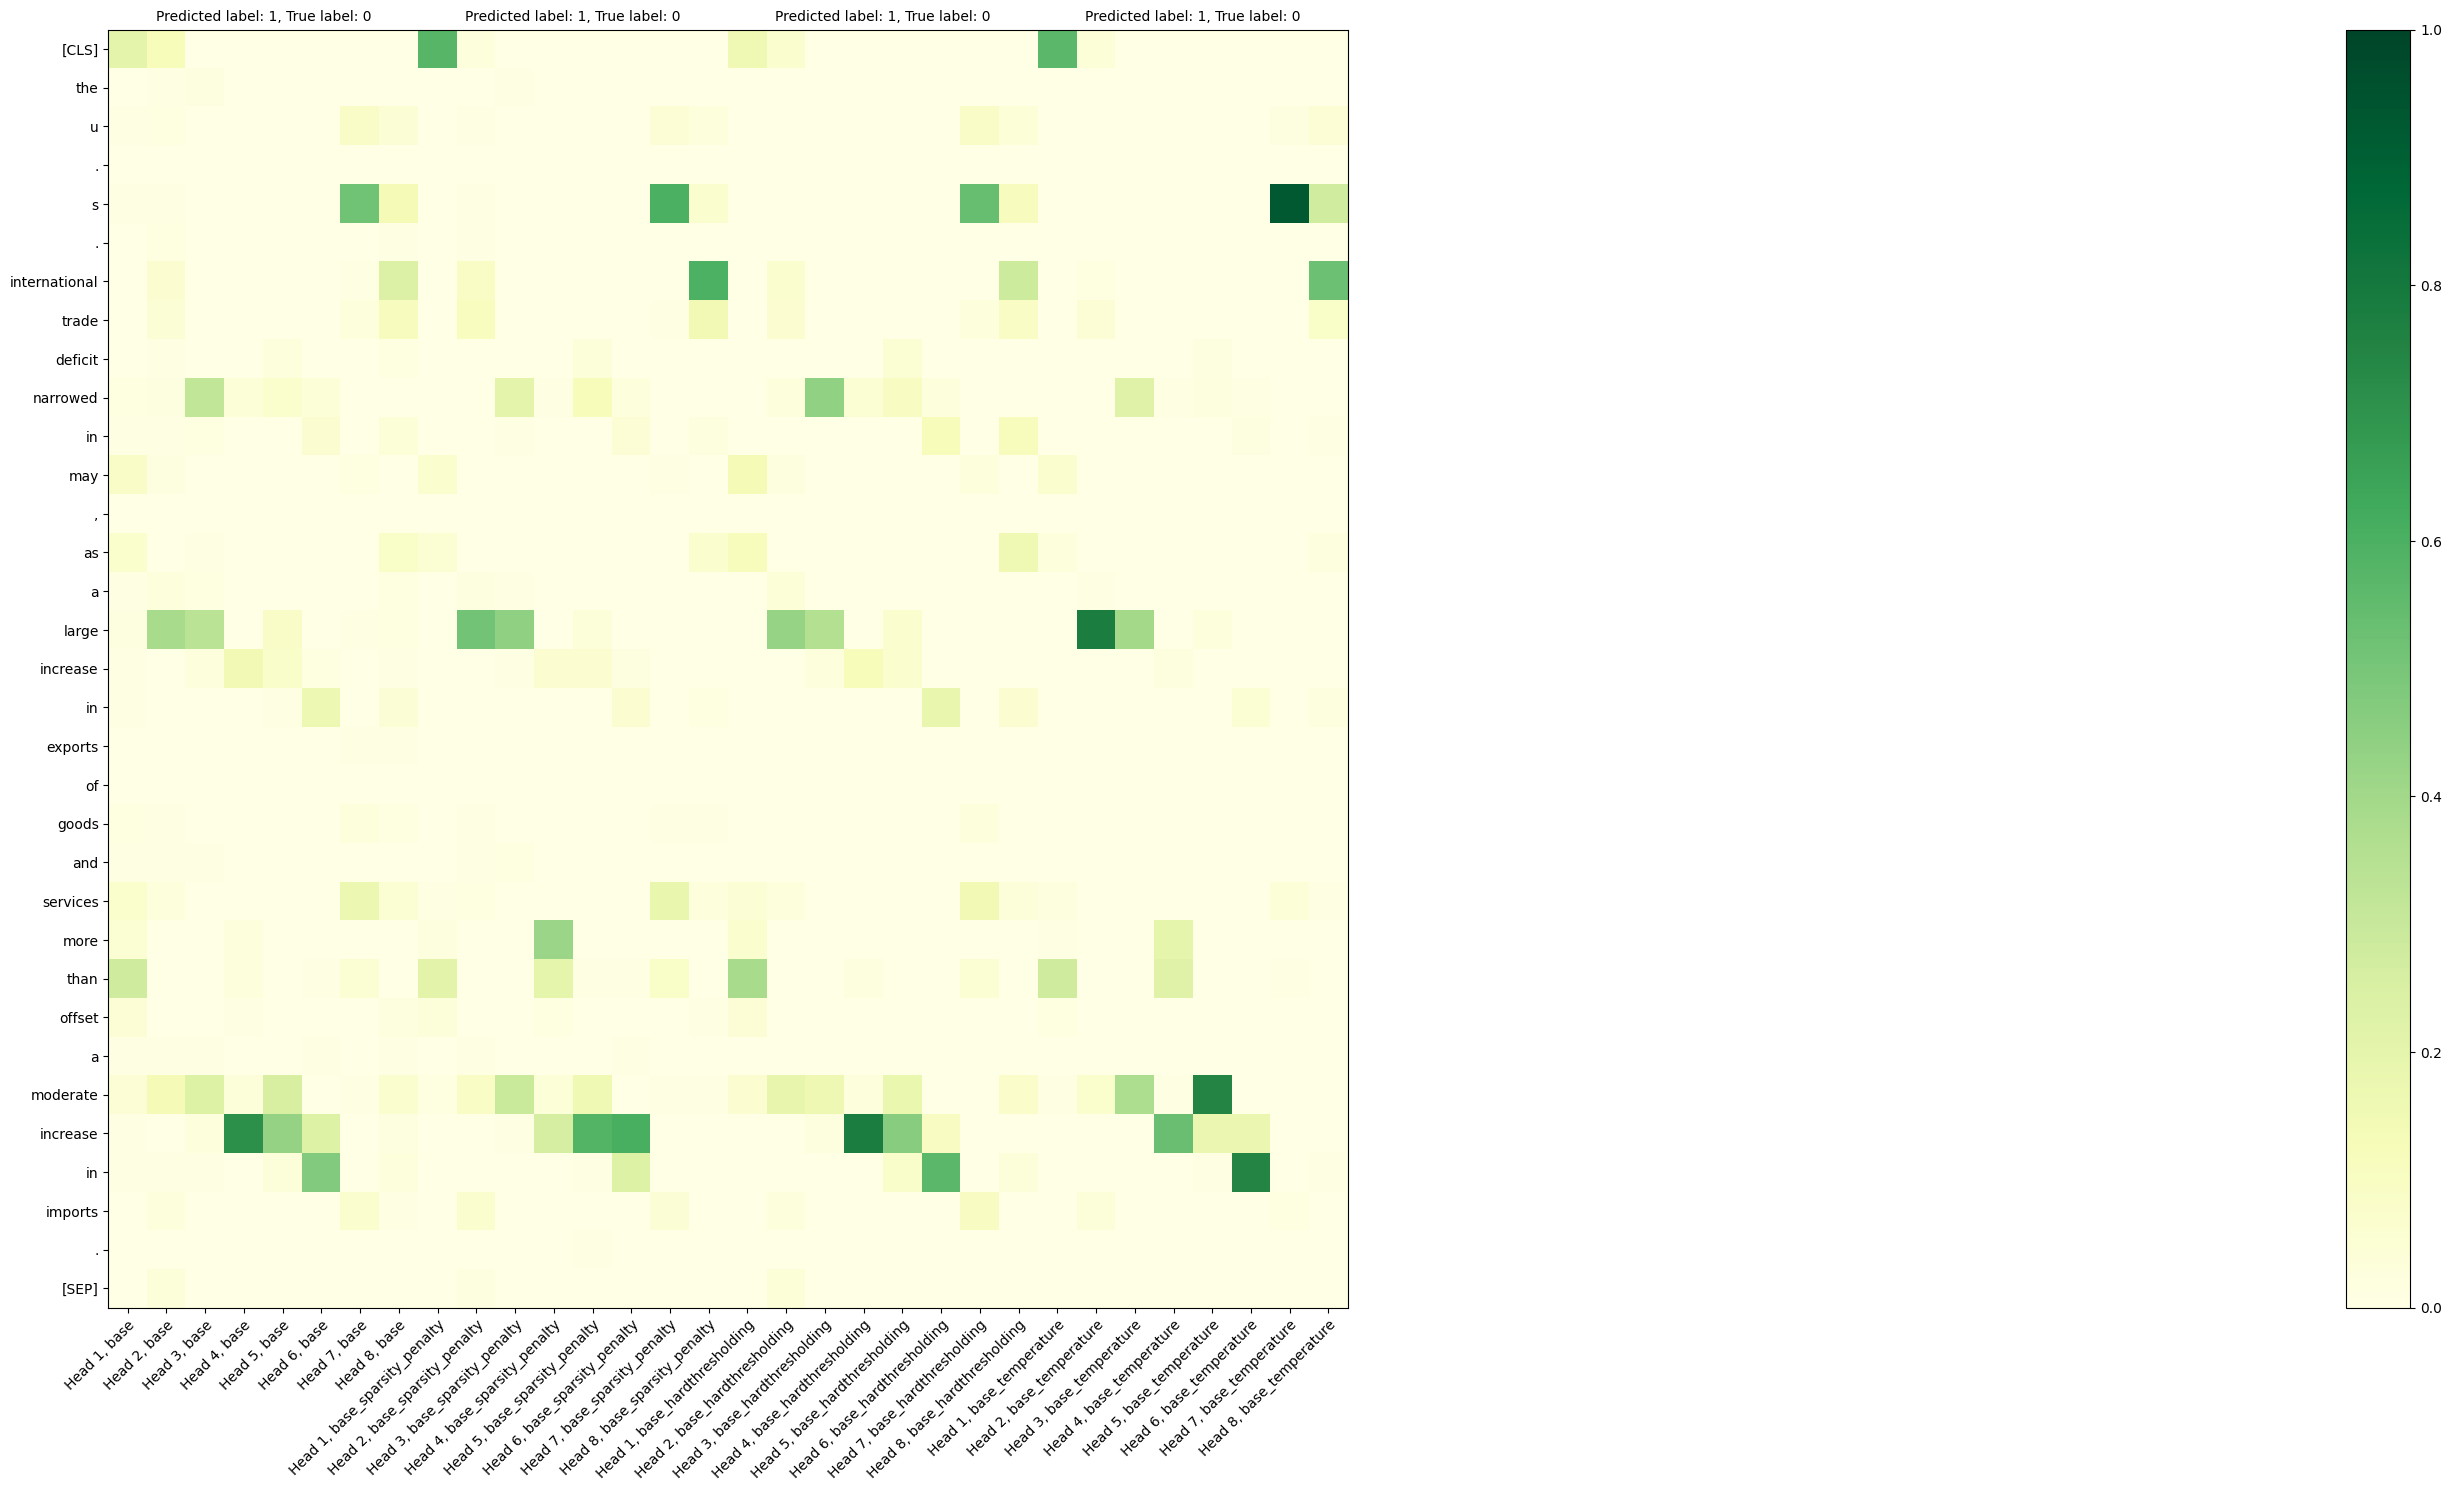

In [37]:
plot_test_sentence(idx, tokenizer, input_ids_test, true, preds[:4], cls_attn_weightss[:4], experiment_names[:4])

the u. s. international trade deficit narrowed in may, as a large increase in exports of goods and services more than offset a moderate increase in imports.



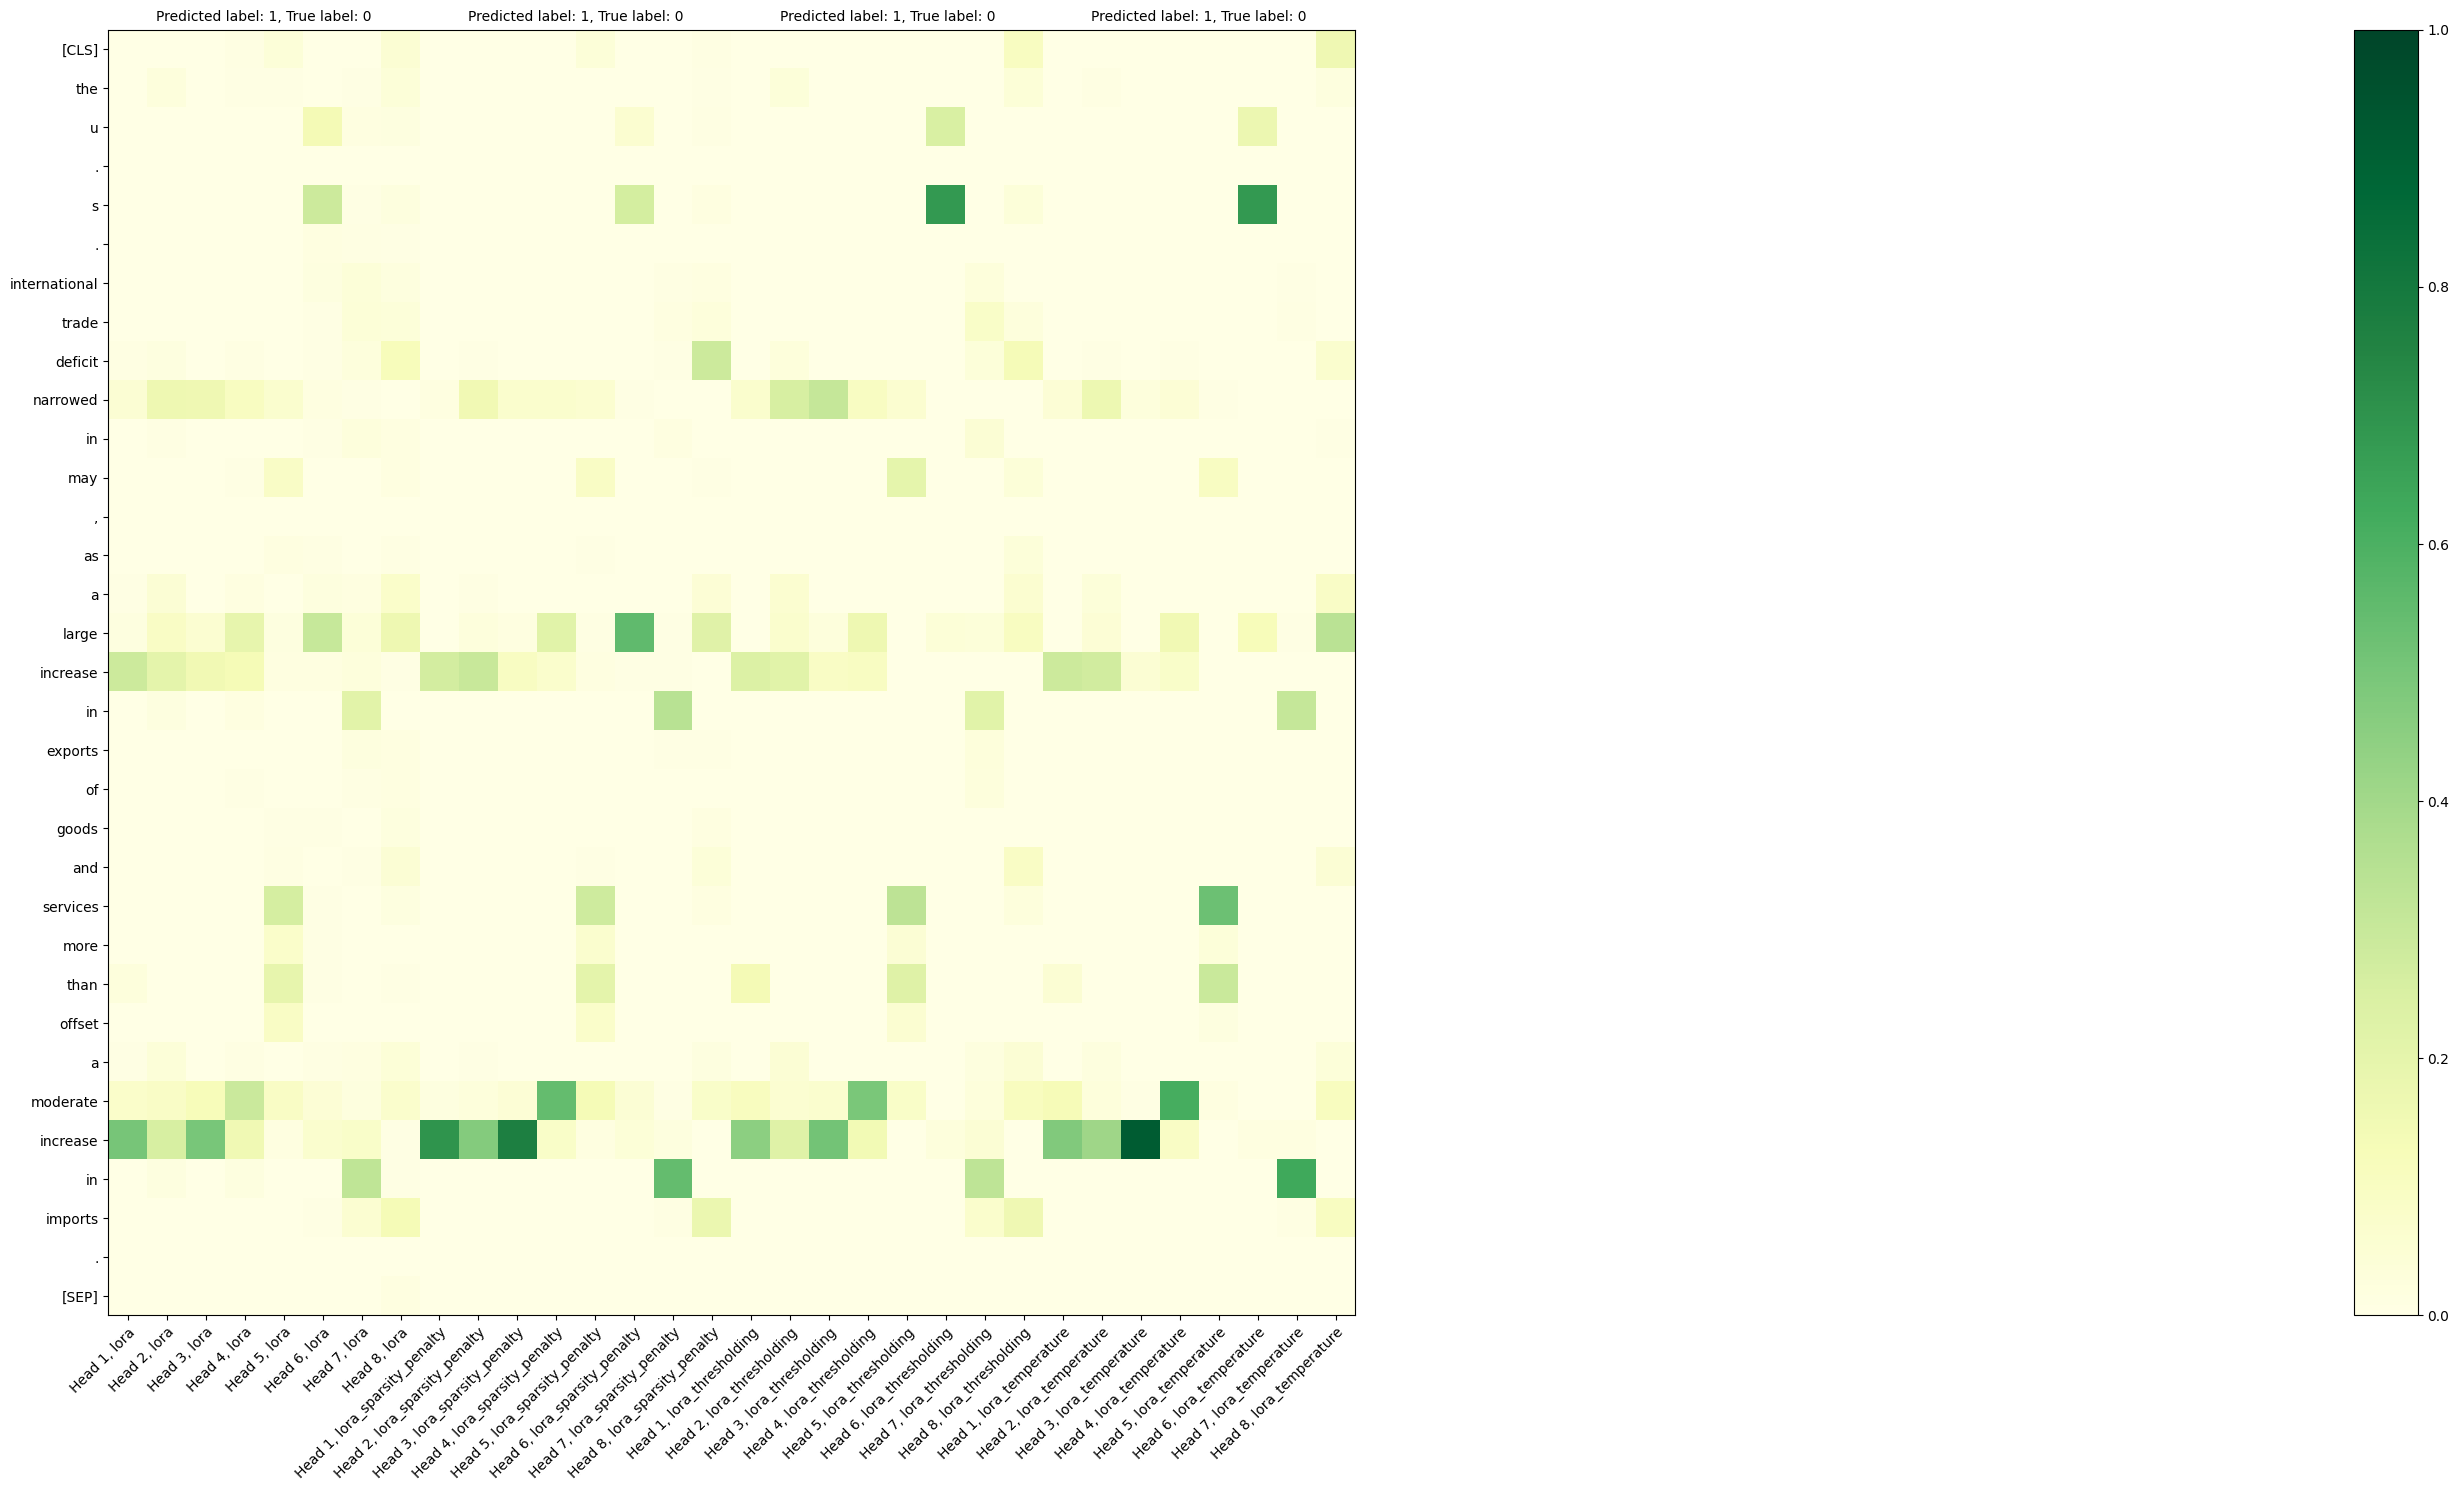

In [38]:
plot_test_sentence(idx, tokenizer, input_ids_test, true, preds[4:], cls_attn_weightss[4:], experiment_names[4:], lora=True)

In [30]:
idx=10

i look forward, as always, to my conversation with tim, but first, please allow me to offer a few remarks on the economic outlook, federal reserve monetary policy, and our new monetary policy framework.



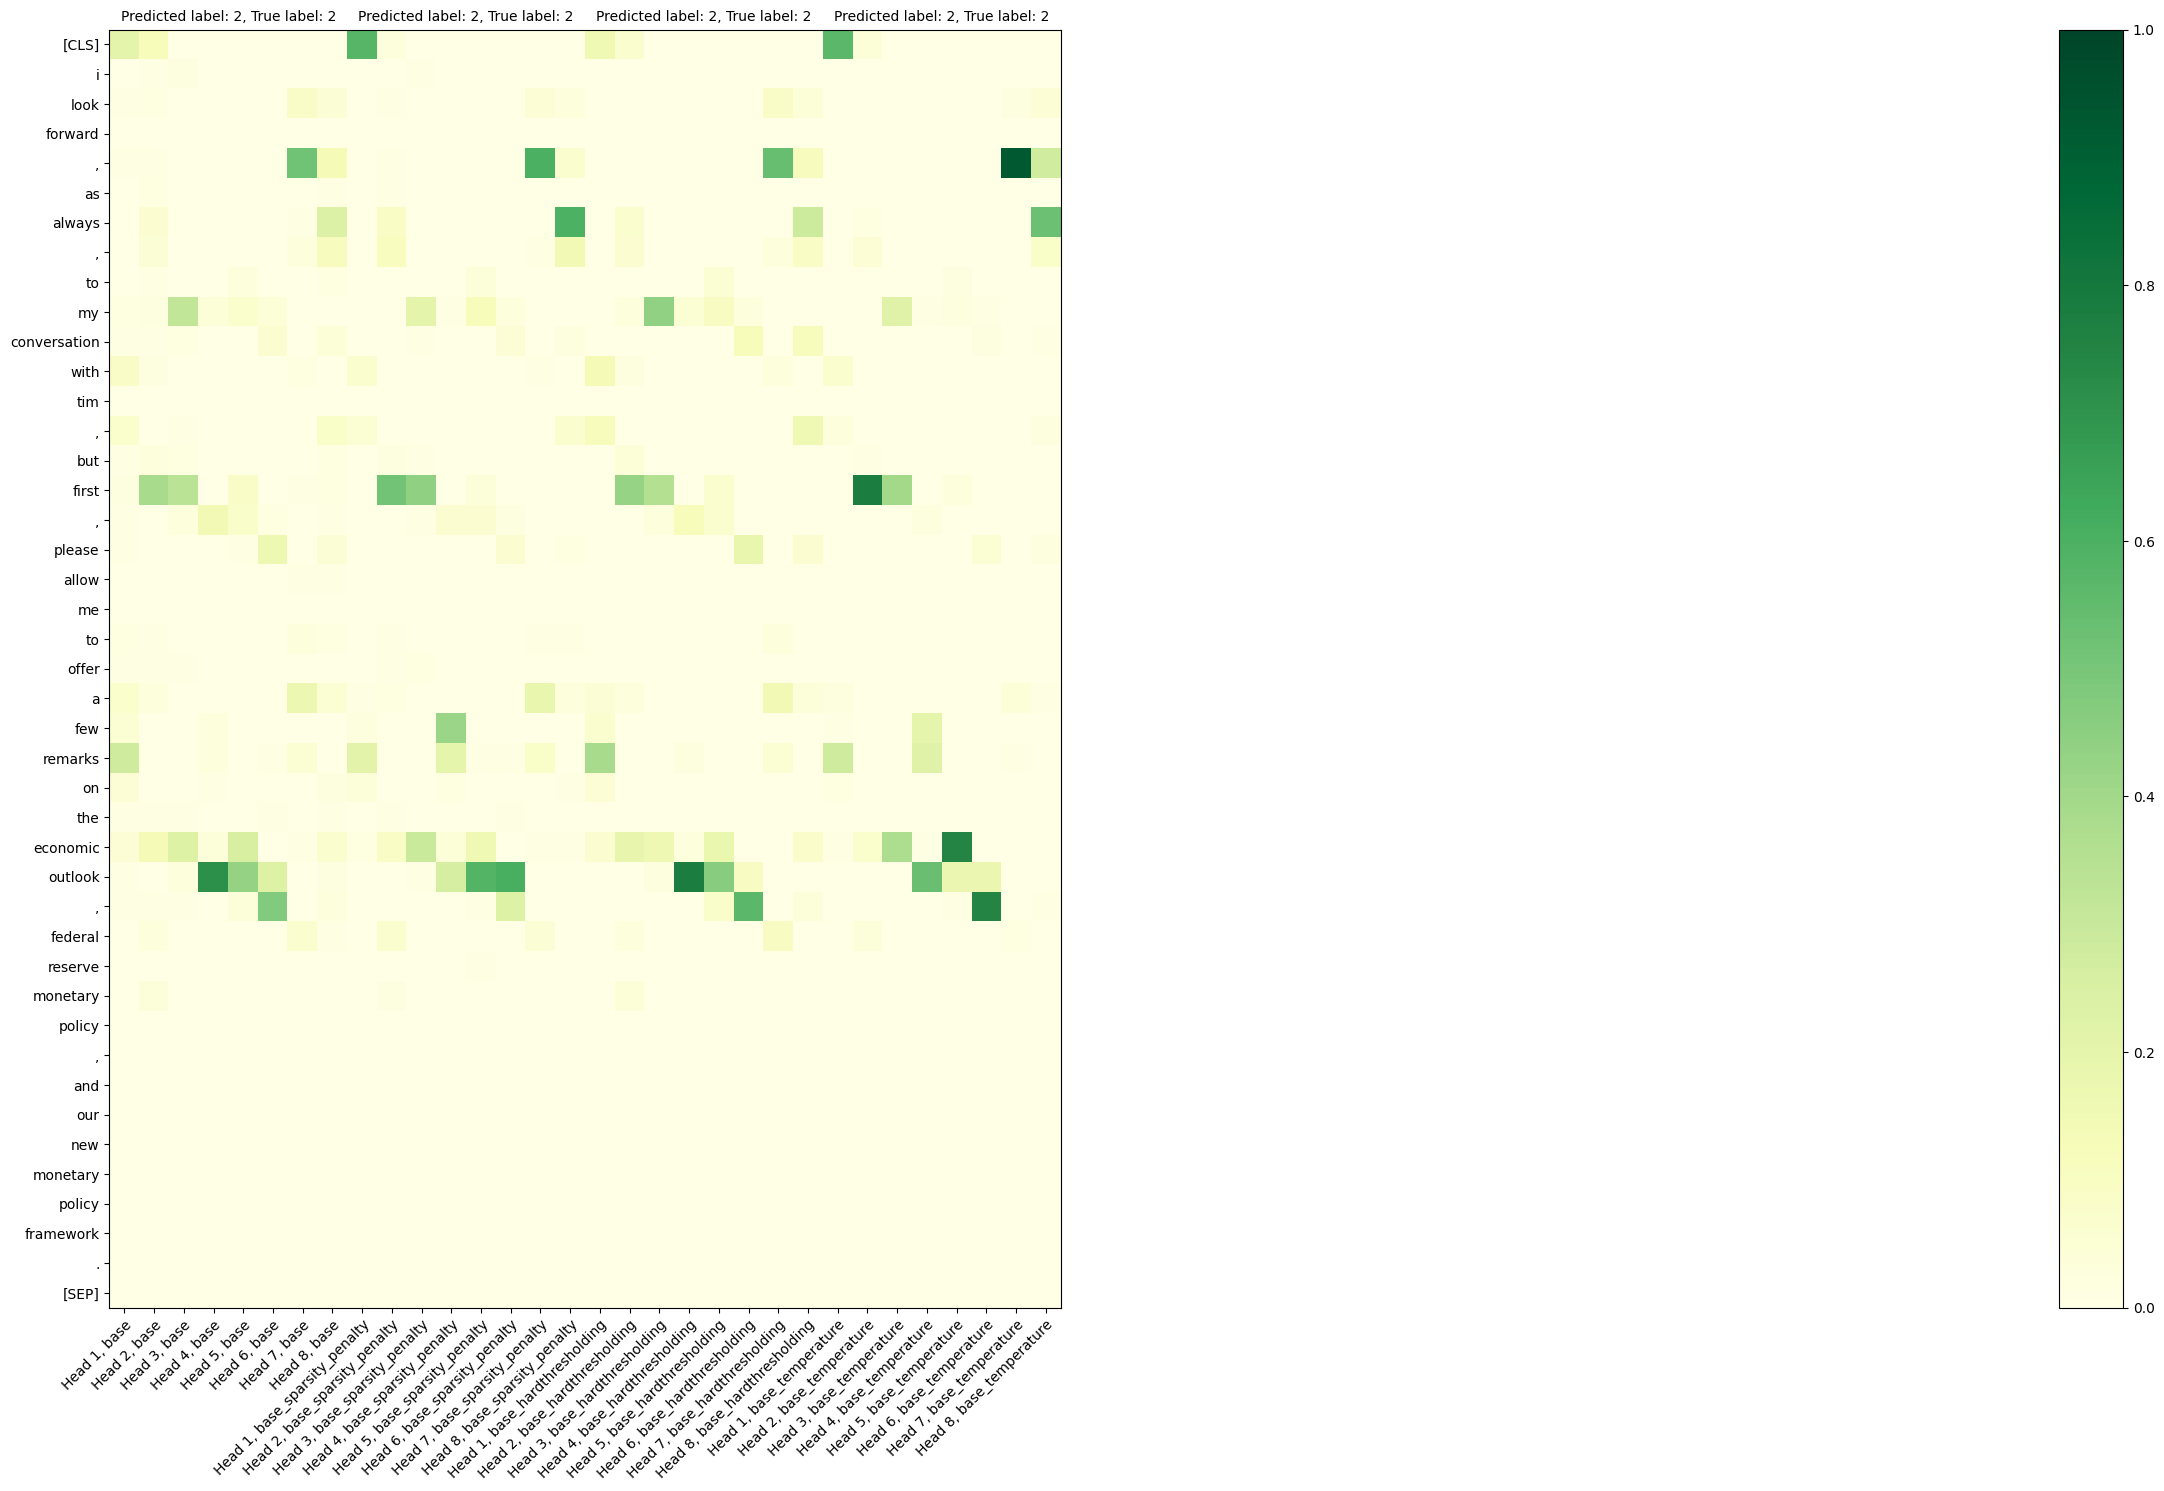

In [31]:
plot_test_sentence(idx, tokenizer, input_ids_test, true, preds[:4], cls_attn_weightss[:4], experiment_names[:4])

i look forward, as always, to my conversation with tim, but first, please allow me to offer a few remarks on the economic outlook, federal reserve monetary policy, and our new monetary policy framework.



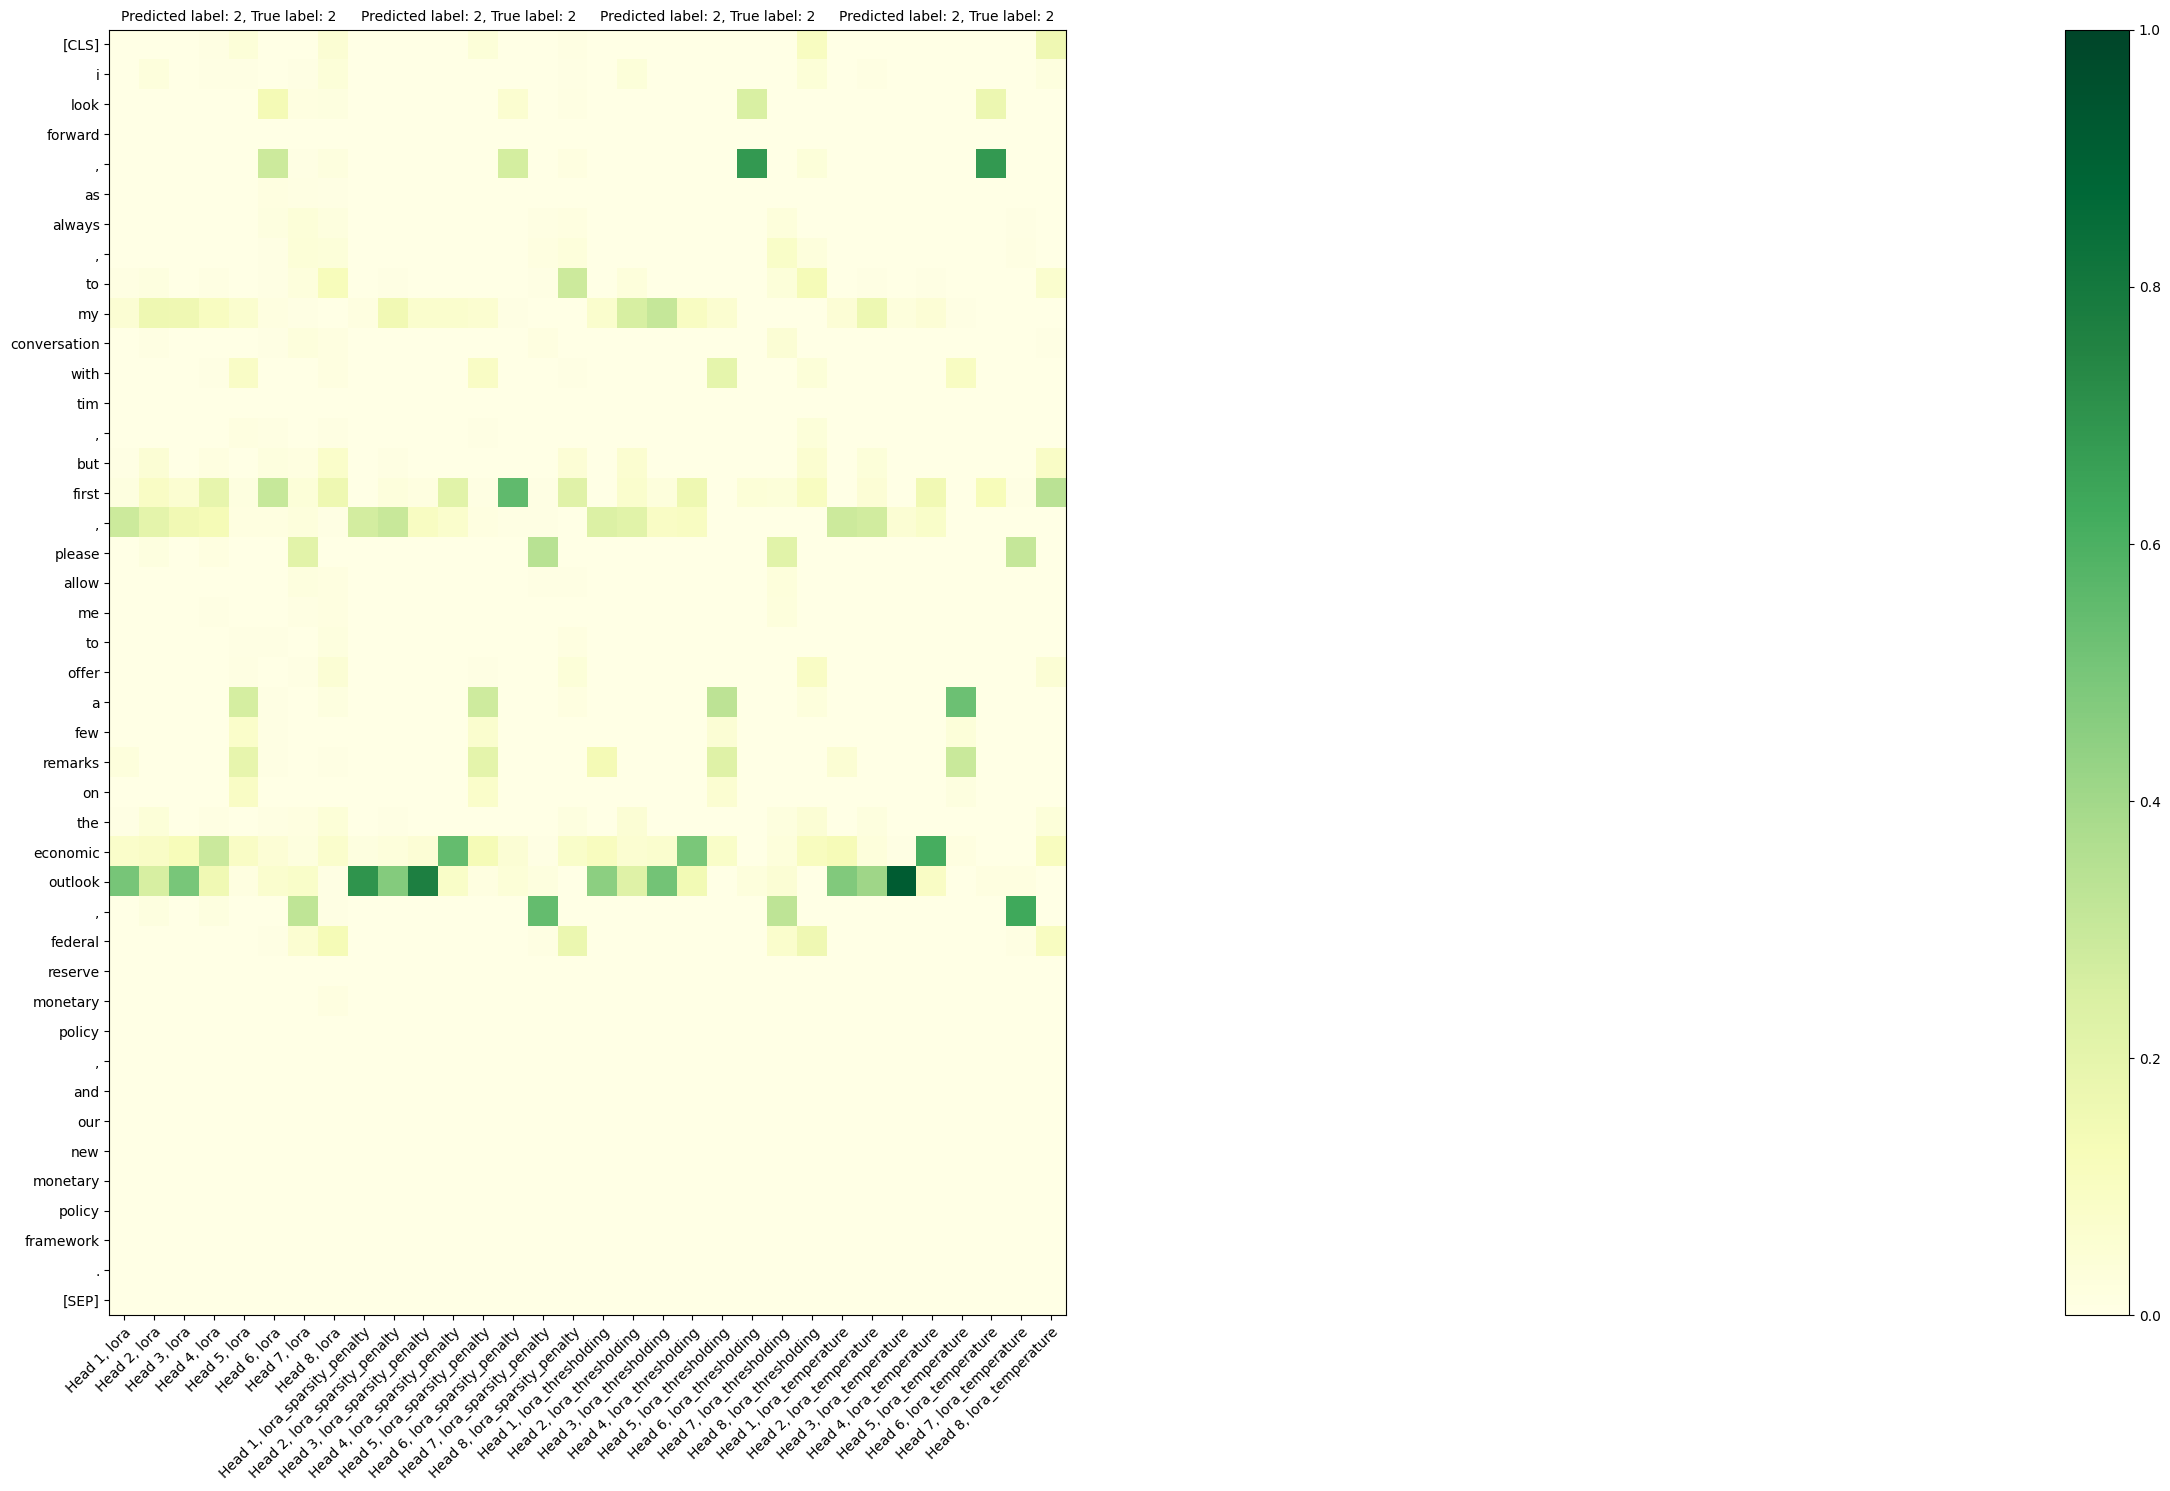

In [32]:
plot_test_sentence(idx, tokenizer, input_ids_test, true, preds[4:], cls_attn_weightss[4:], experiment_names[4:], lora=True)

In [33]:
idx=20

they noted that the economy had entered the new year with considerable momentum and very few indications that growth was moderating from what appeared to be an unsustainable rate.



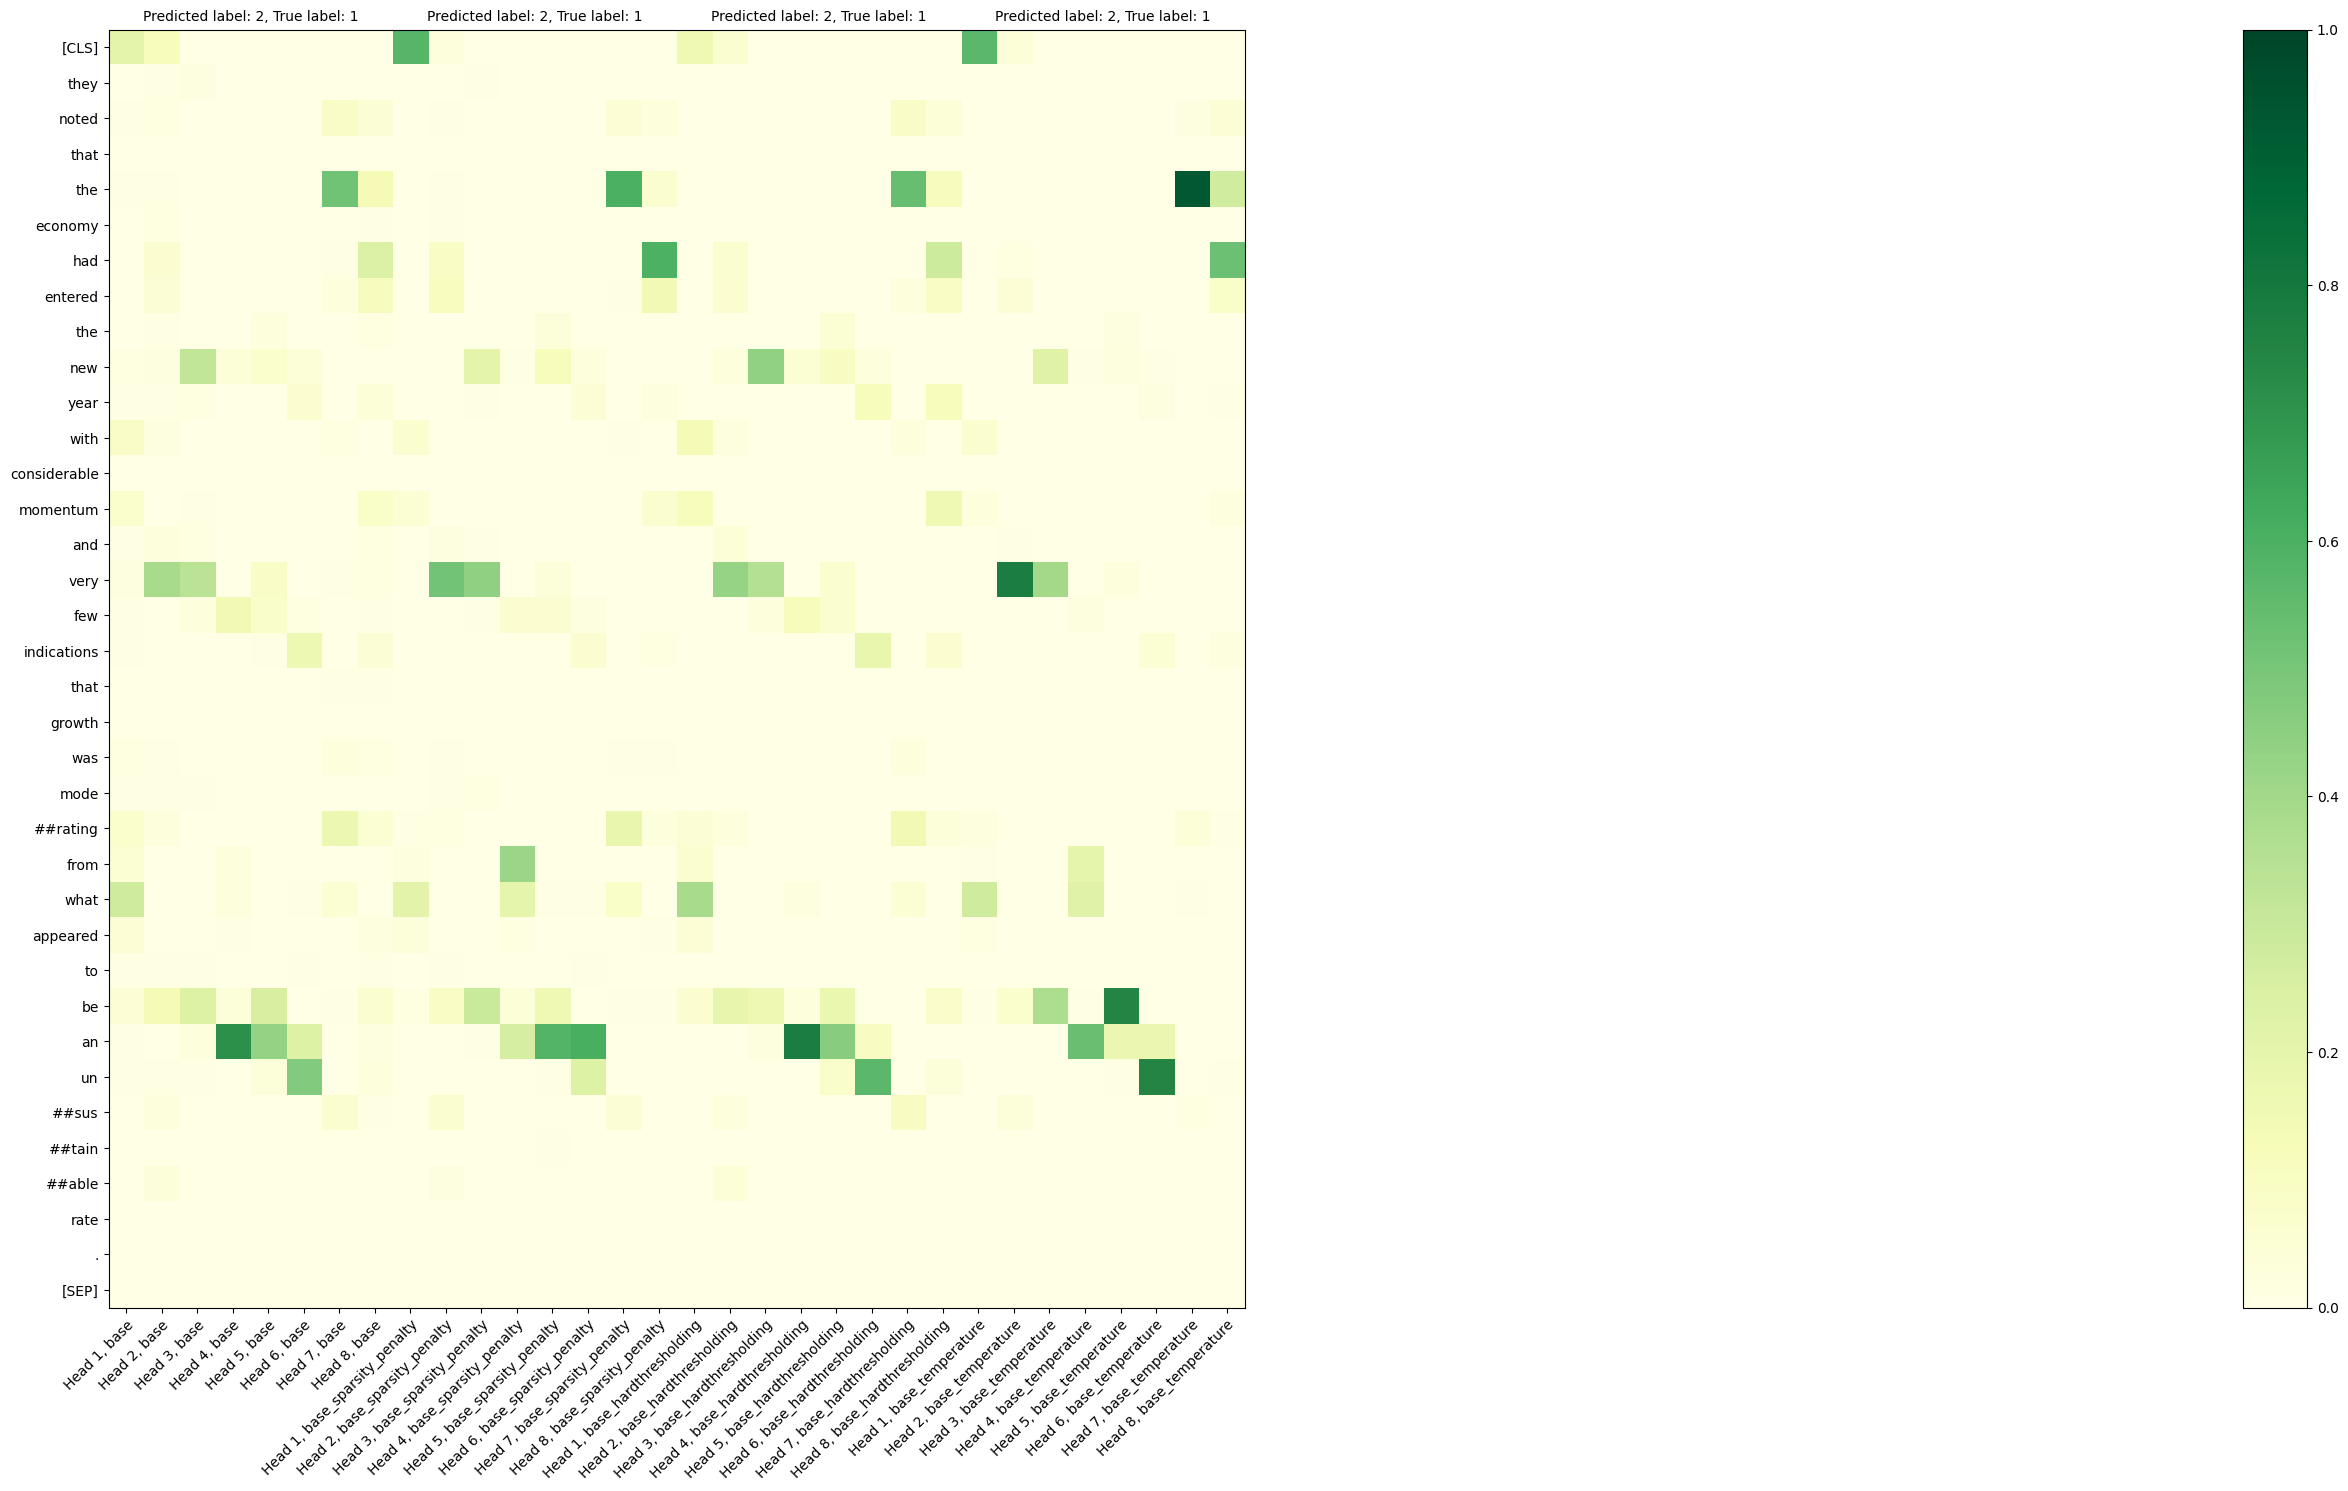

In [34]:
plot_test_sentence(idx, tokenizer, input_ids_test, true, preds[:4], cls_attn_weightss[:4], experiment_names[:4])

they noted that the economy had entered the new year with considerable momentum and very few indications that growth was moderating from what appeared to be an unsustainable rate.



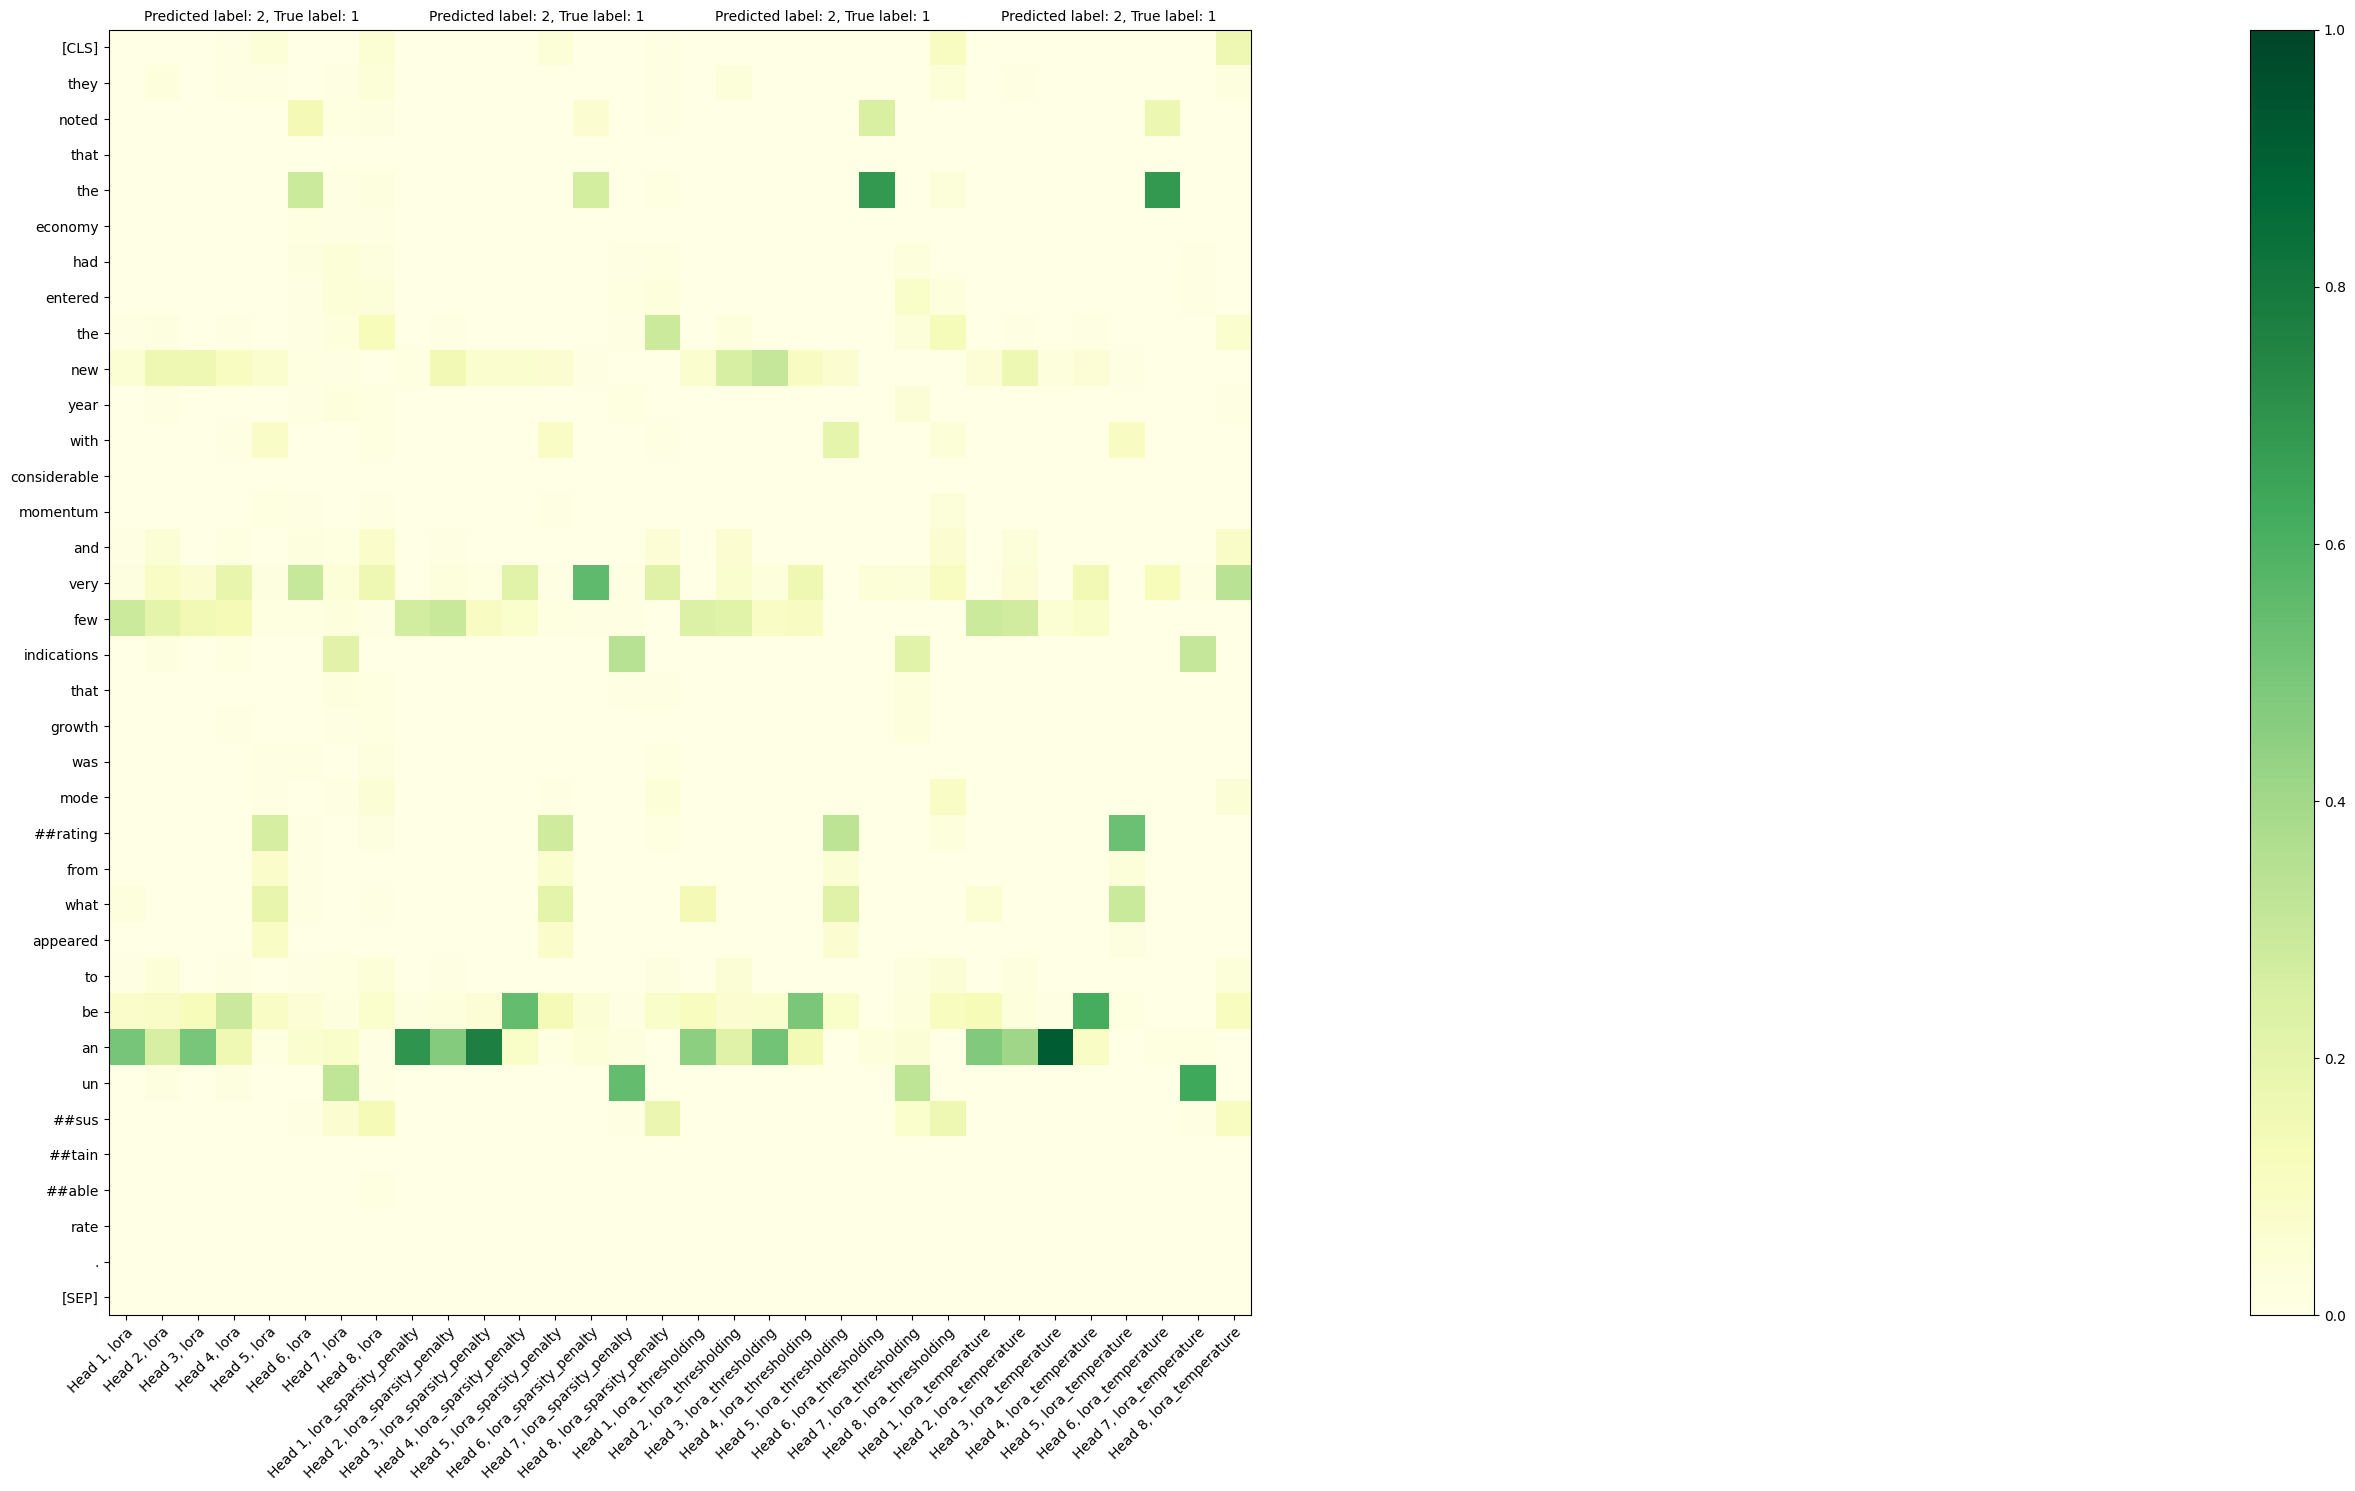

In [35]:
plot_test_sentence(idx, tokenizer, input_ids_test, true, preds[4:], cls_attn_weightss[4:], experiment_names[4:], lora=True)

In [39]:
idx=30

the prospect of additional fiscal stimulus likely contributed to a steeper u. s. treasury yield curve, increased inflation compensation, and broad dollar depreciation.



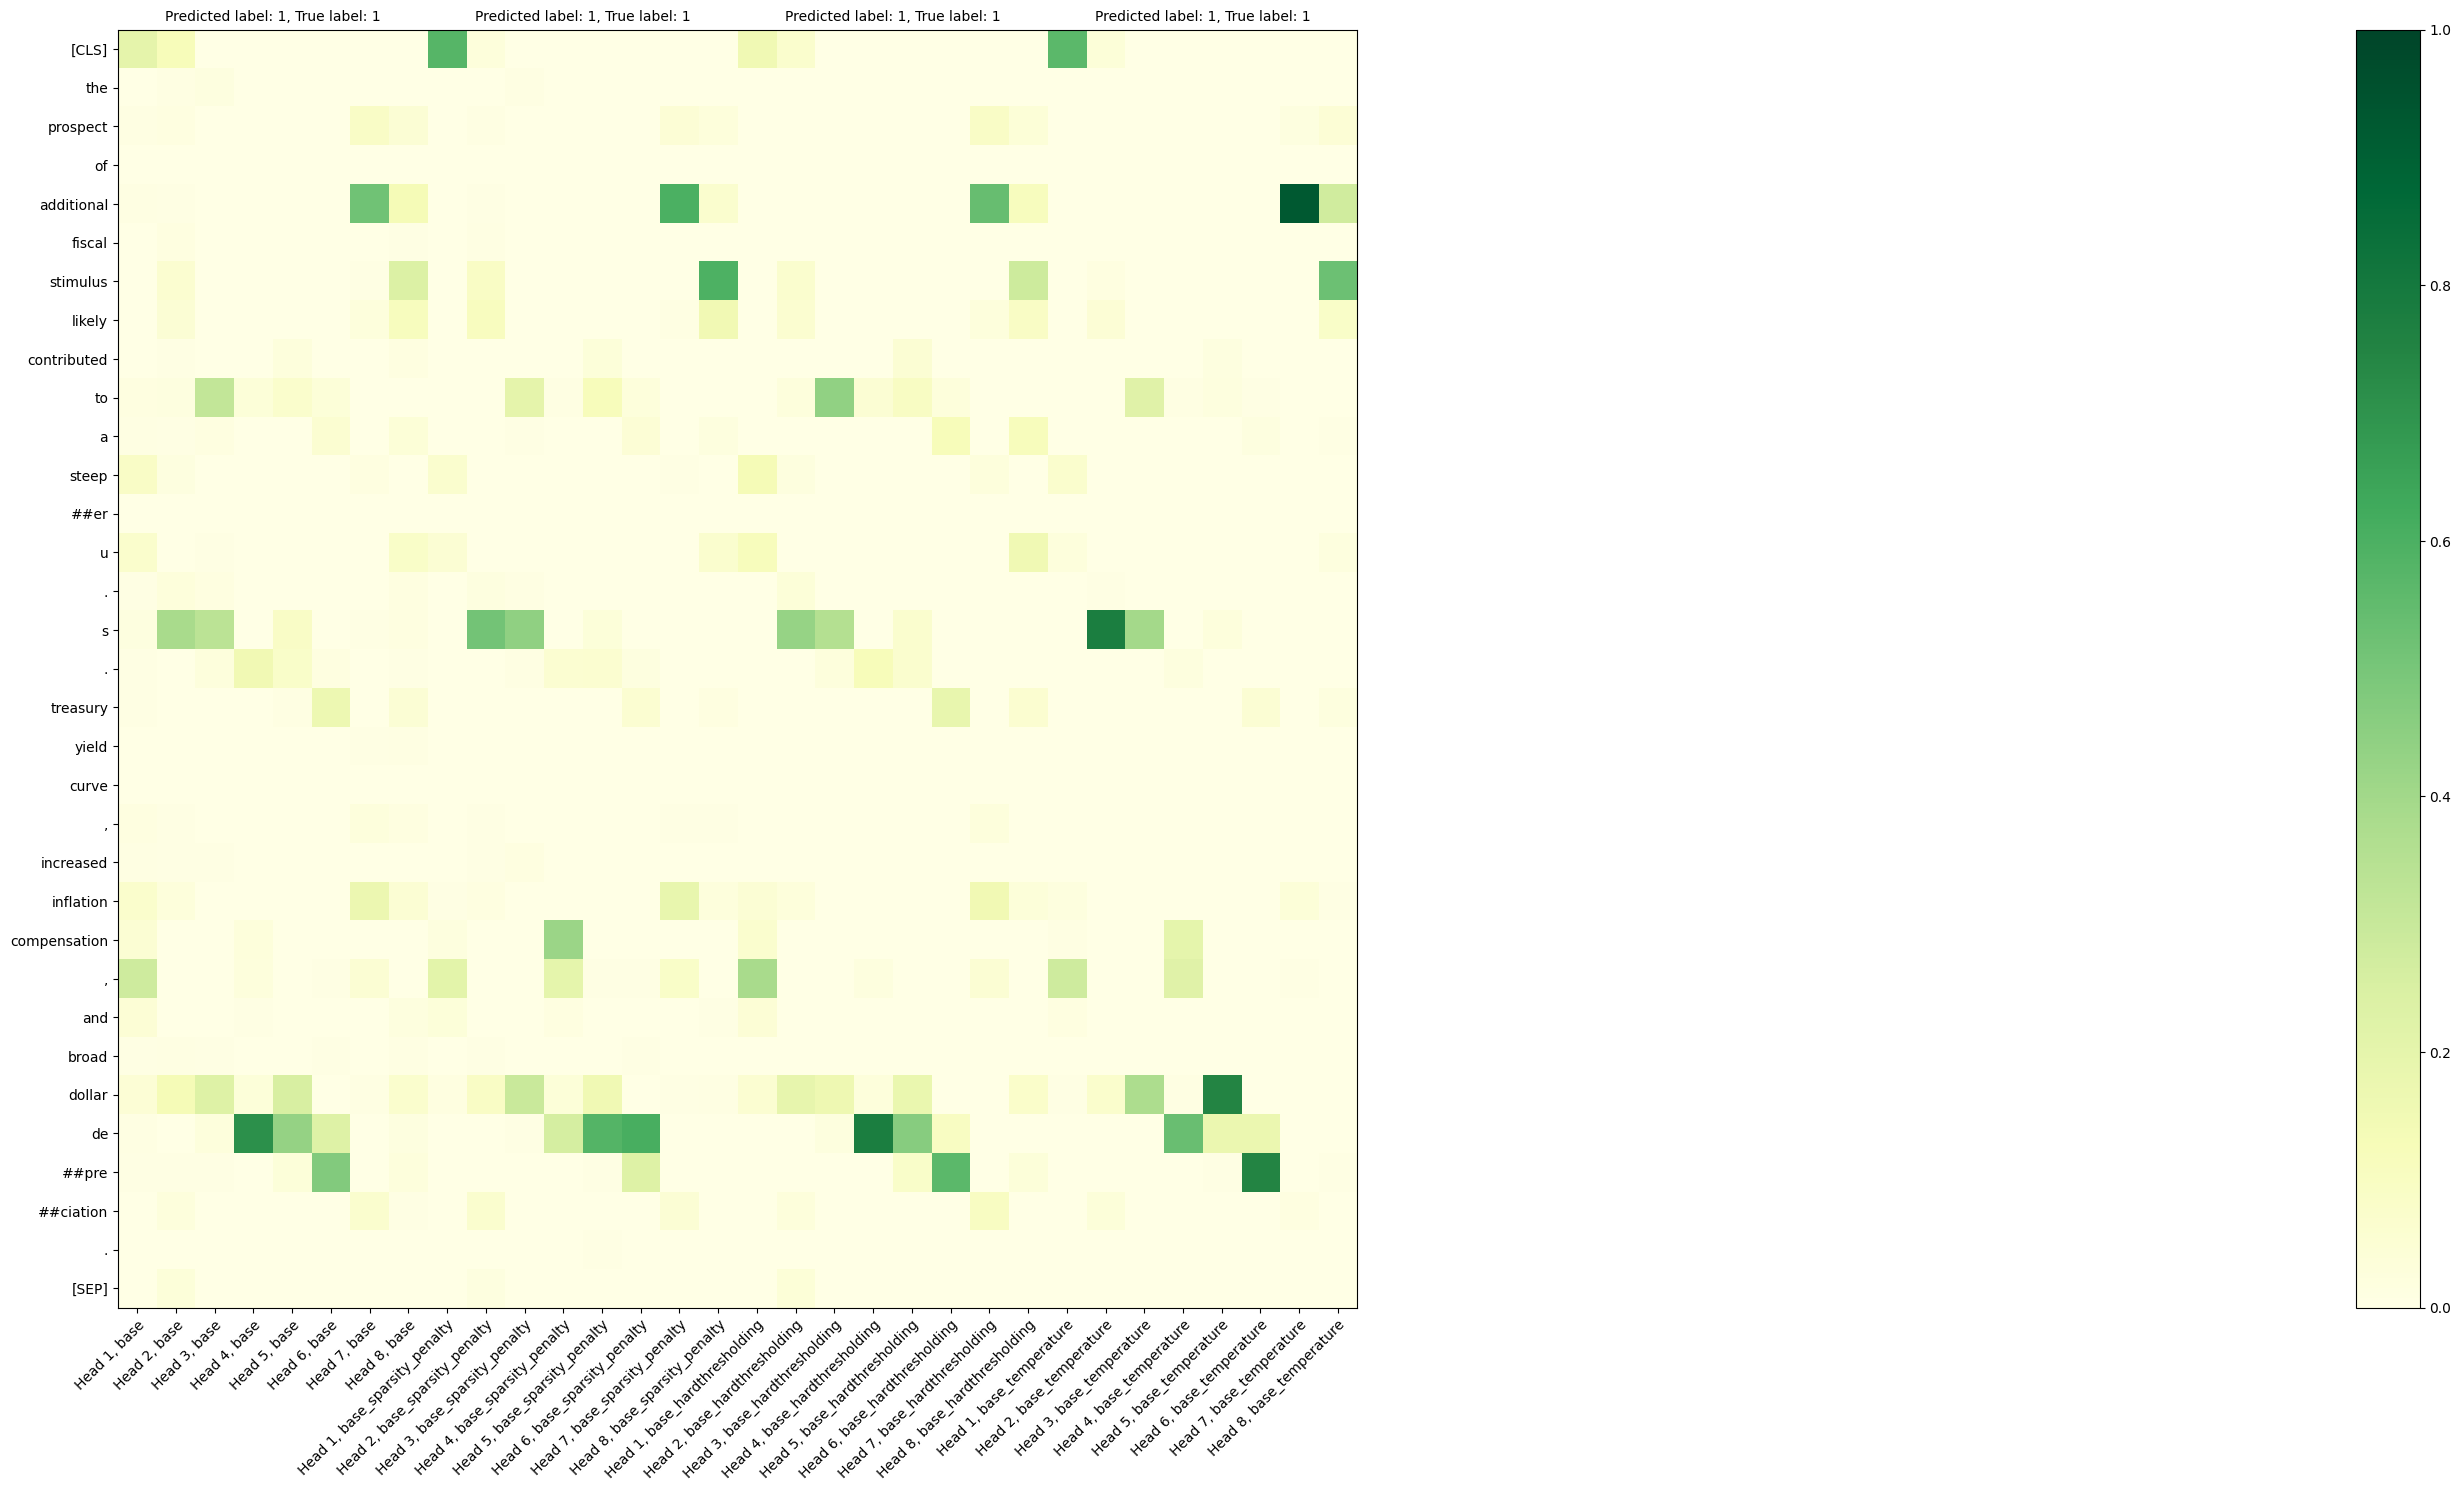

In [40]:
plot_test_sentence(idx, tokenizer, input_ids_test, true, preds[:4], cls_attn_weightss[:4], experiment_names[:4])

the prospect of additional fiscal stimulus likely contributed to a steeper u. s. treasury yield curve, increased inflation compensation, and broad dollar depreciation.



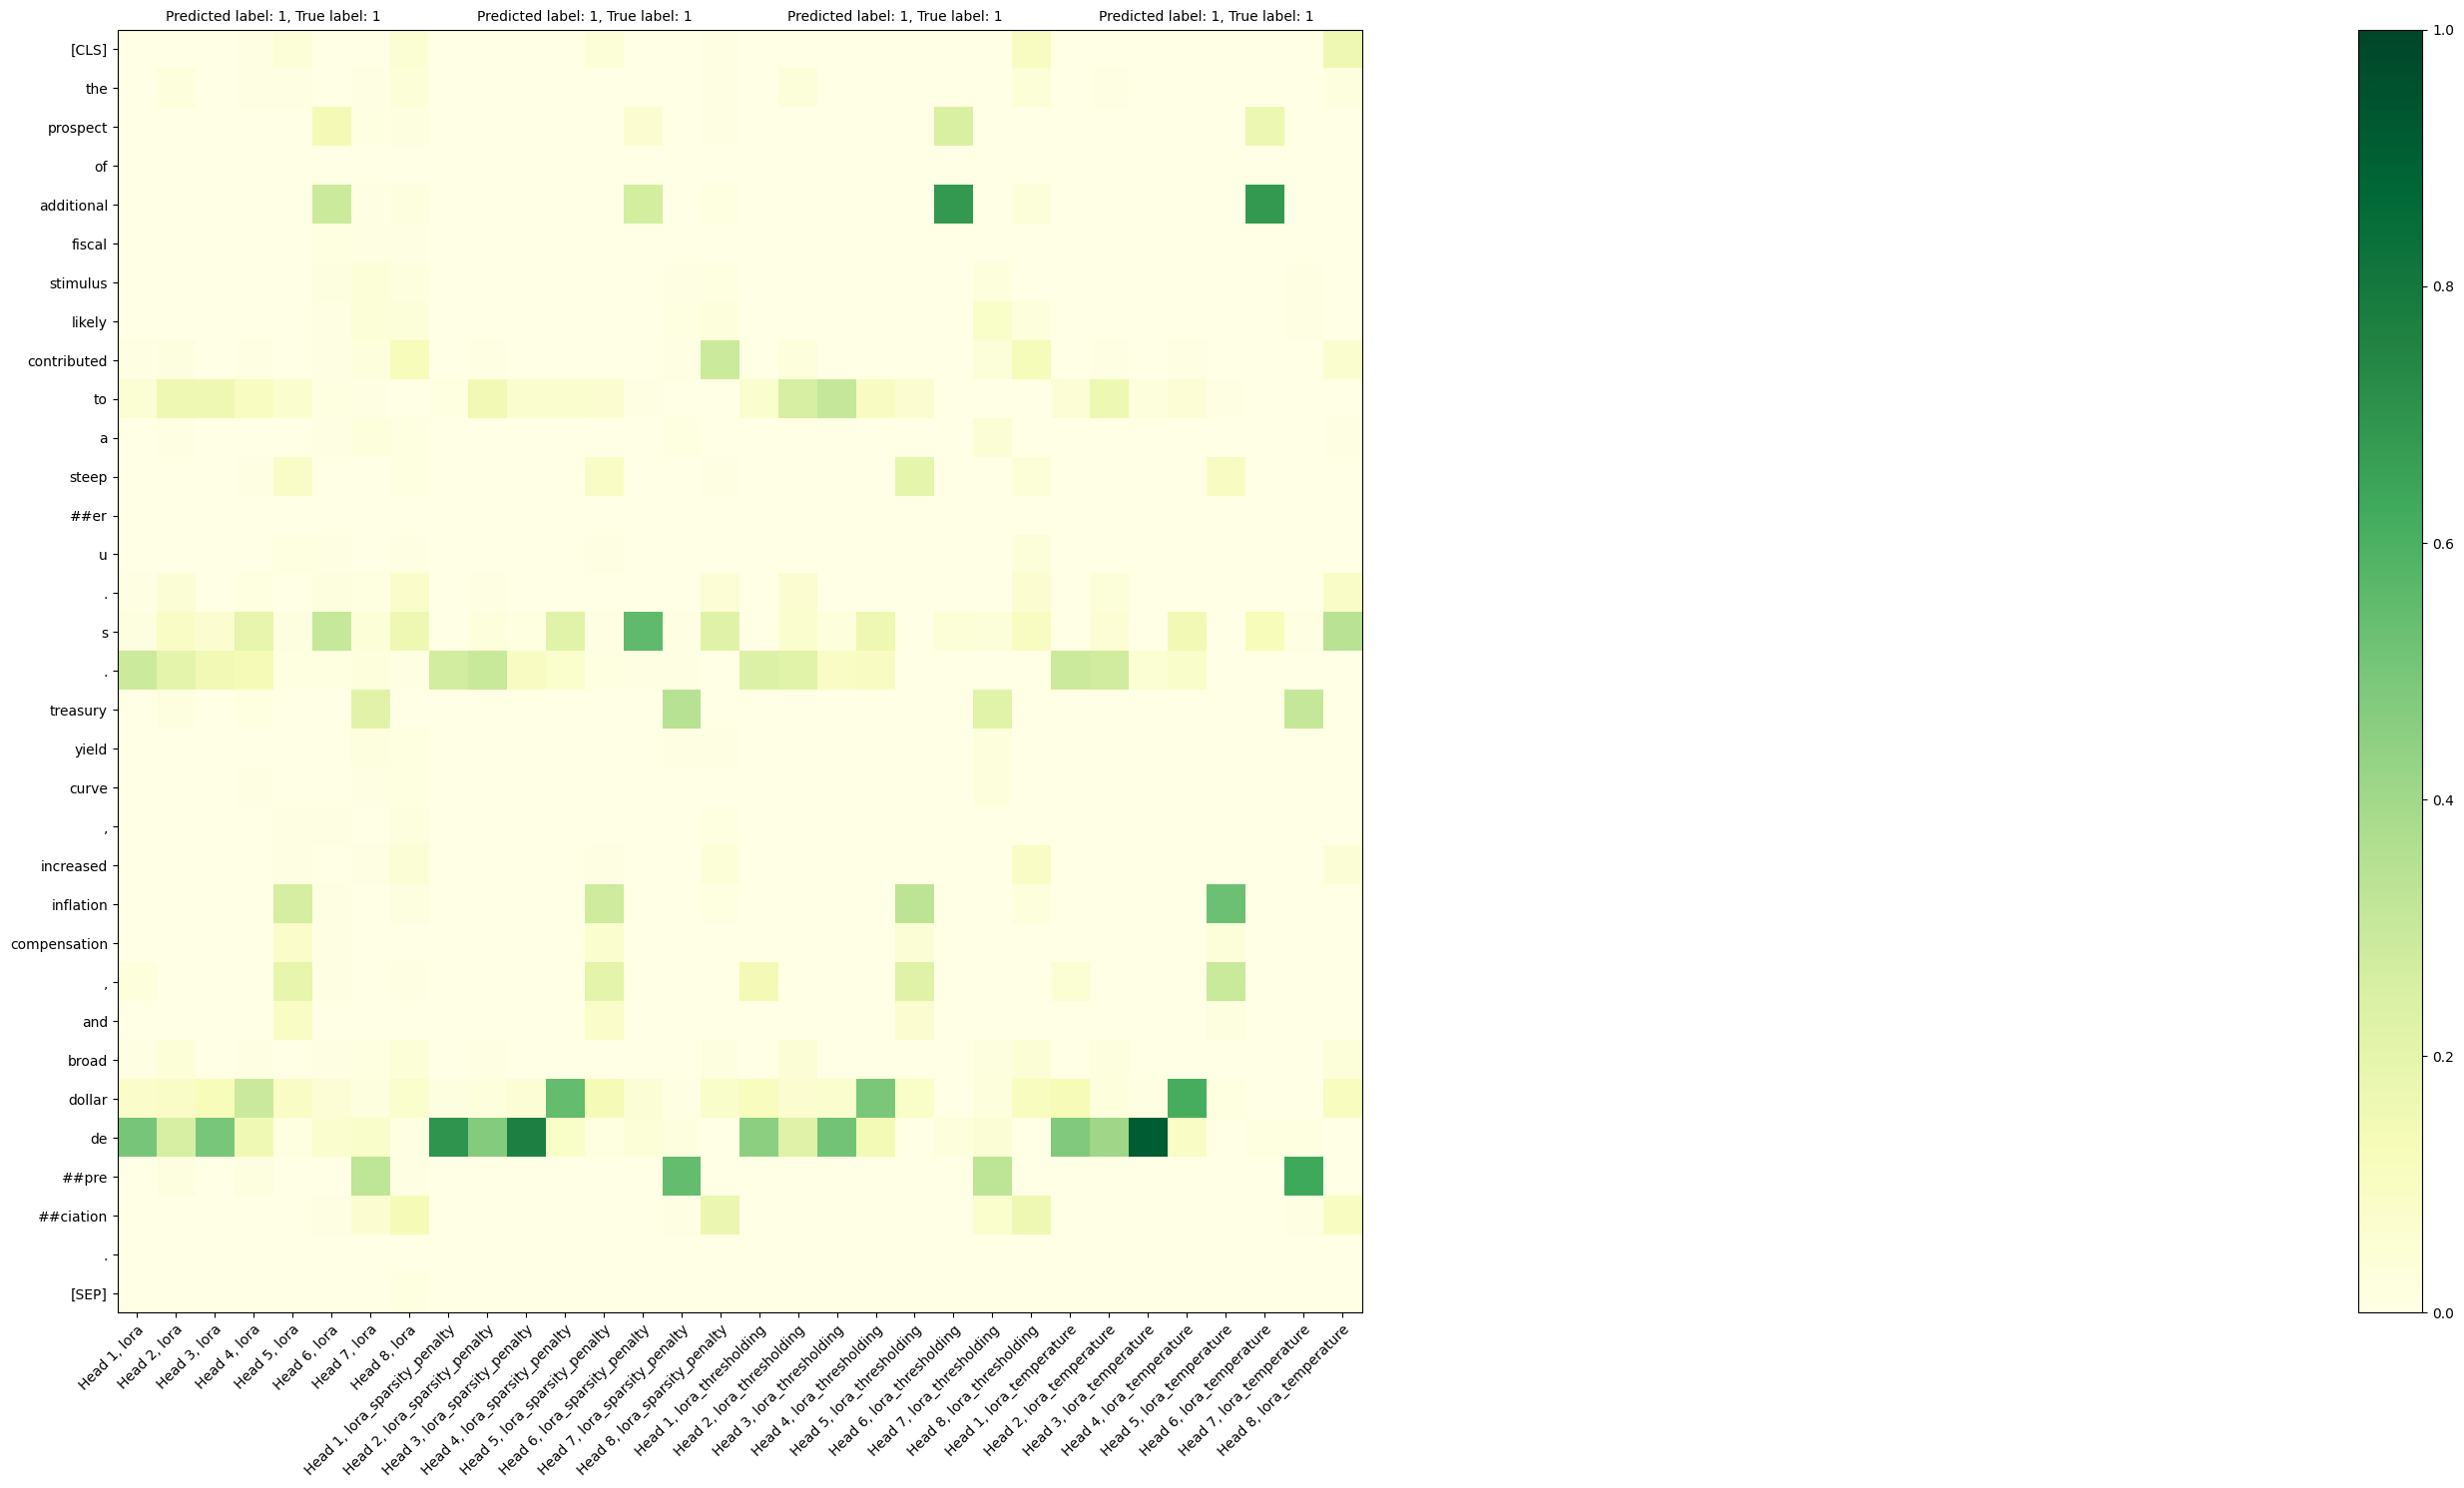

In [41]:
plot_test_sentence(idx, tokenizer, input_ids_test, true, preds[4:], cls_attn_weightss[4:], experiment_names[4:], lora=True)